# 0. Imports

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from keras import layers, regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, silhouette_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor, kneighbors_graph
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from datetime import timedelta
from sklearn.linear_model import LogisticRegression

# 1. Exploratory data analysis - EDA


In [2]:
# Download the dataset
dataframe_1 = pd.read_csv('./data/UNSW_NB15_training-set.csv')
dataframe_2 = pd.read_csv('./data/UNSW_NB15_testing-set.csv')
dataframe = pd.concat([dataframe_1, dataframe_2])
dataframe.head(10)

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   
5   6  0.000003   udp       -   INT      2      0     784       0   
6   7  0.000006   udp       -   INT      2      0    1960       0   
7   8  0.000028   udp       -   INT      2      0    1384       0   
8   9  0.000000   arp       -   INT      1      0      46       0   
9  10  0.000000   arp       -   INT      1      0      46       0   

           rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.09020  ...                 1               2             0   
1  125000.00030  ...                 1               2             0   
2  200000.00510  ...                 1               3             0   
3  166666.66080  ...                 1               3             0   
4  100000.00250  ...                 1               3             0   
5  333333.32150  ...                 1               2             0   
6  166666.66080  ...                 1               2             0   
7   35714.28522  ...                 1               3             0   
8       0.00000  ...                 2               2             0   
9       0.00000  ...                 2               2             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   
5           0                 0           2           2                0   
6           0                 0           2           2                0   
7           0                 0           1           3                0   
8           0                 0           2           2                1   
9           0                 0           2           2                1   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  
5      Normal      0  
6      Normal      0  
7      Normal      0  
8      Normal      0  
9      Normal      0  

[10 rows x 45 columns]

In [3]:
dataframe.shape

(257673, 45)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt 

In [5]:
dataframe.drop(dataframe.columns[dataframe.columns.str.contains('id', case=False)], axis=1, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  dinpkt 

In [6]:
# Überprüfen Sie auf gemischte Typen in den Spalten
mixed_types = dataframe.apply(lambda x: any(isinstance(val, str) for val in x))

# Zeigen Sie die gemischten Typen und ihre Werte an
print("Gemischte Typen in den Spalten:")
for column, is_mixed_type in mixed_types.items():
    if is_mixed_type:
        mixed_values = dataframe.loc[dataframe[column].apply(lambda x: isinstance(x, str)), column].unique()
        print(f"Spalte {column} enthält gemischte Typen mit den Werten: {mixed_values}")

Gemischte Typen in den Spalten:
Spalte proto enthält gemischte Typen mit den Werten: ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 

<Axes: xlabel='label', ylabel='Count'>

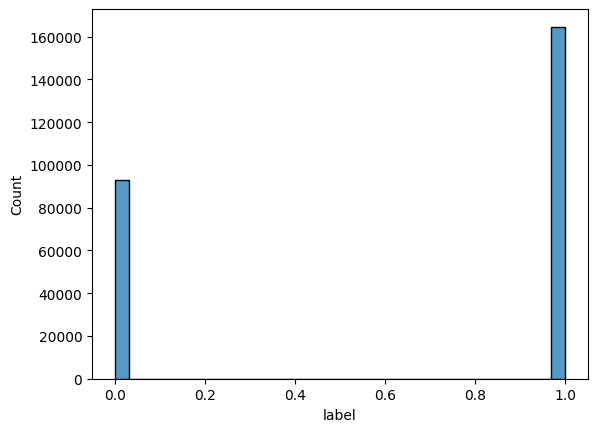

In [7]:
sns.histplot(x = dataframe.label)

## 1.2 Nummeric feature analysis

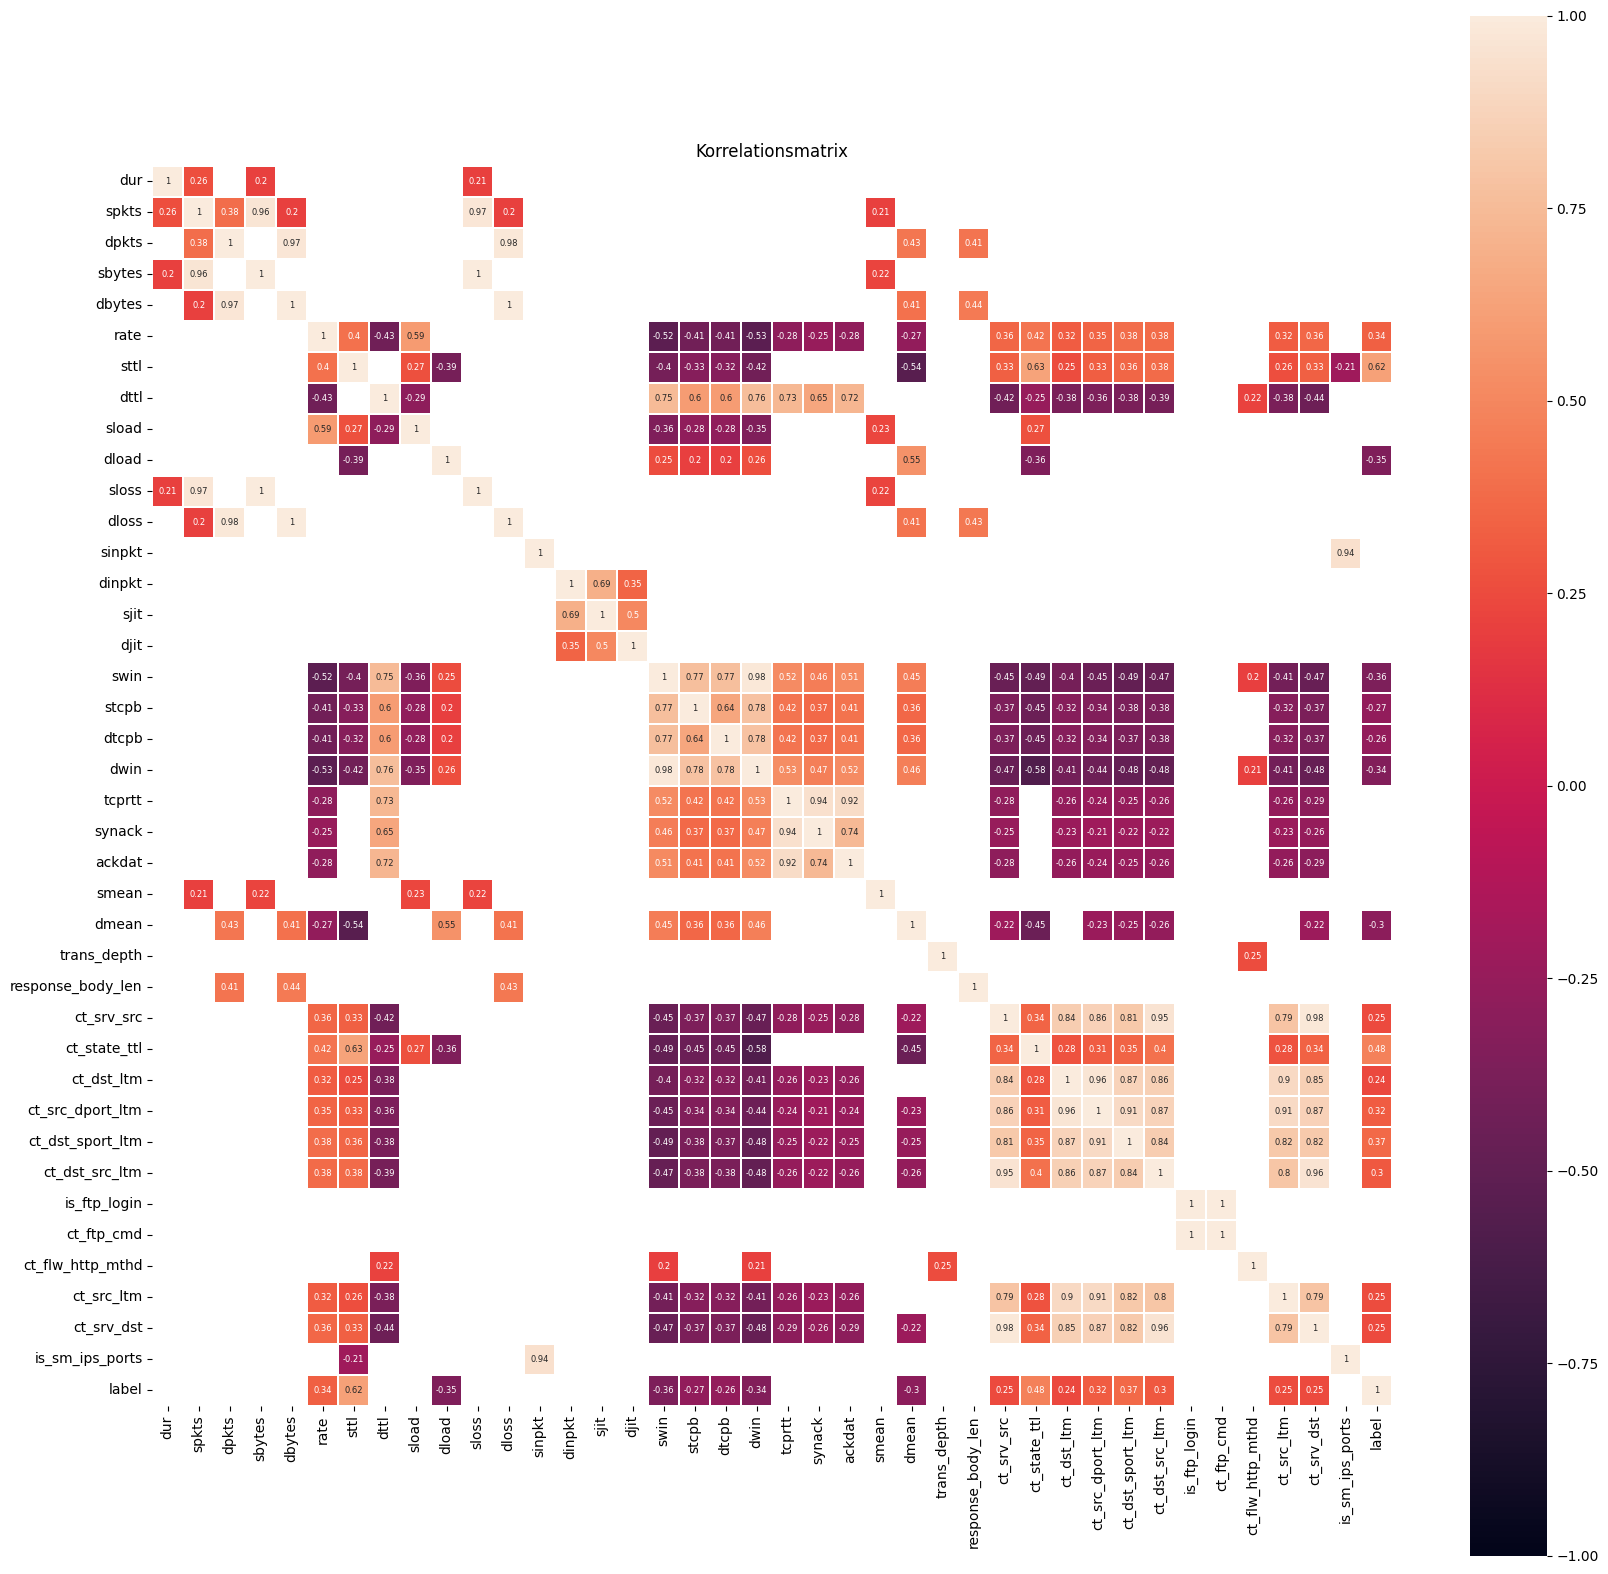

In [8]:
nummerisch = dataframe.select_dtypes(include=['float64', 'int64', 'int16', 'int32'])
corr_matrix = nummerisch.corr()
plt.figure(figsize=(20, 20))

sns.heatmap(corr_matrix[(corr_matrix >= 0.2) | (corr_matrix <= -0.2)], vmax=1.0, 
            vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 6}, square=True)
plt.title('Korrelationsmatrix')
plt.show()

In [9]:
df_num_corr = dataframe.corr(numeric_only=True)['label']
df_num_corr = df_num_corr[df_num_corr >= 0]
print(df_num_corr)

dur                 0.029096
sbytes              0.019376
rate                0.335883
sttl                0.624082
dttl                0.019369
sload               0.165249
sloss               0.001828
ackdat              0.000817
trans_depth         0.002246
ct_srv_src          0.246596
ct_state_ttl        0.476559
ct_dst_ltm          0.240776
ct_src_dport_ltm    0.318518
ct_dst_sport_ltm    0.371672
ct_dst_src_ltm      0.299609
ct_src_ltm          0.252498
ct_srv_dst          0.247812
label               1.000000
Name: label, dtype: float64


In [10]:
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("There are {} strongly correlated values with Target:\n{}".format(len(golden_features_list), golden_features_list))

There are 18 strongly correlated values with Target:
label               1.000000
sttl                0.624082
ct_state_ttl        0.476559
ct_dst_sport_ltm    0.371672
rate                0.335883
ct_src_dport_ltm    0.318518
ct_dst_src_ltm      0.299609
ct_src_ltm          0.252498
ct_srv_dst          0.247812
ct_srv_src          0.246596
ct_dst_ltm          0.240776
sload               0.165249
dur                 0.029096
sbytes              0.019376
dttl                0.019369
trans_depth         0.002246
sloss               0.001828
ackdat              0.000817
Name: label, dtype: float64


## 1.3 Object feature analysis

In [11]:
df_not_num = dataframe.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 4 non numerical features including:
['proto', 'service', 'state', 'attack_cat']


In [12]:
dtypes = dataframe.dtypes
categorical_features = dtypes[dtypes == 'object'].index.tolist()

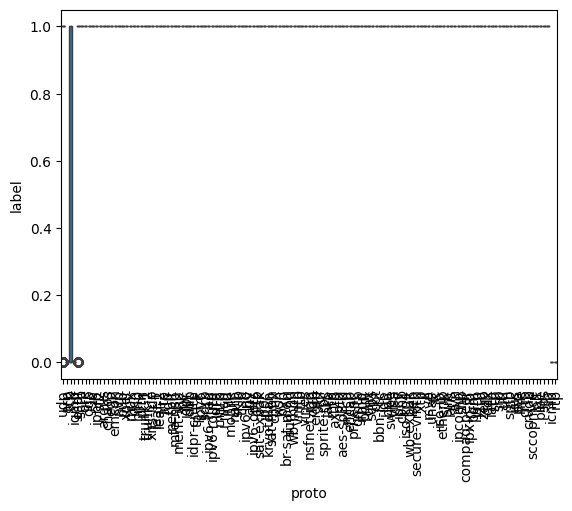

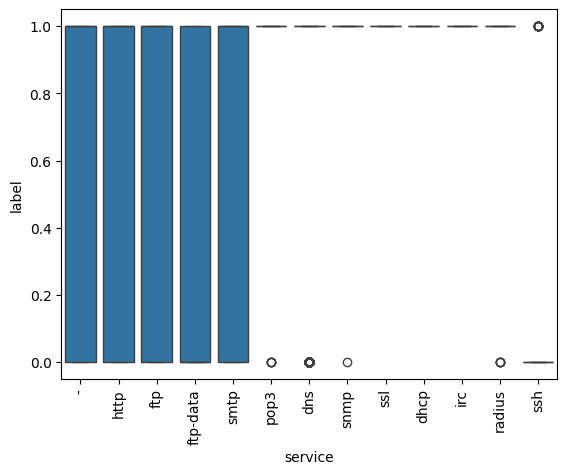

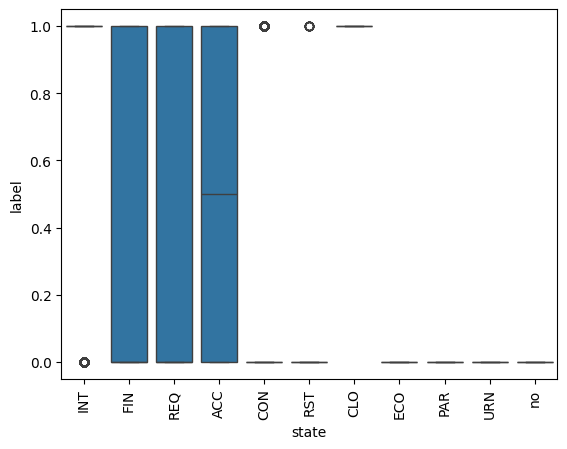

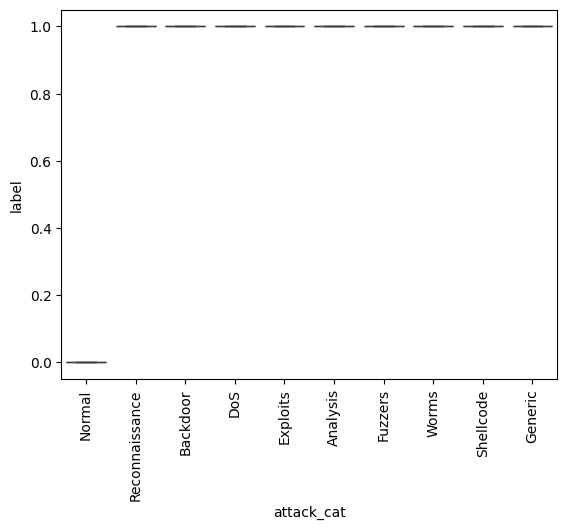

In [13]:
for feature in df_not_num:
        sns.boxplot(x=feature, y='label', data=dataframe)
        plt.xticks(rotation=90)  
        plt.show()

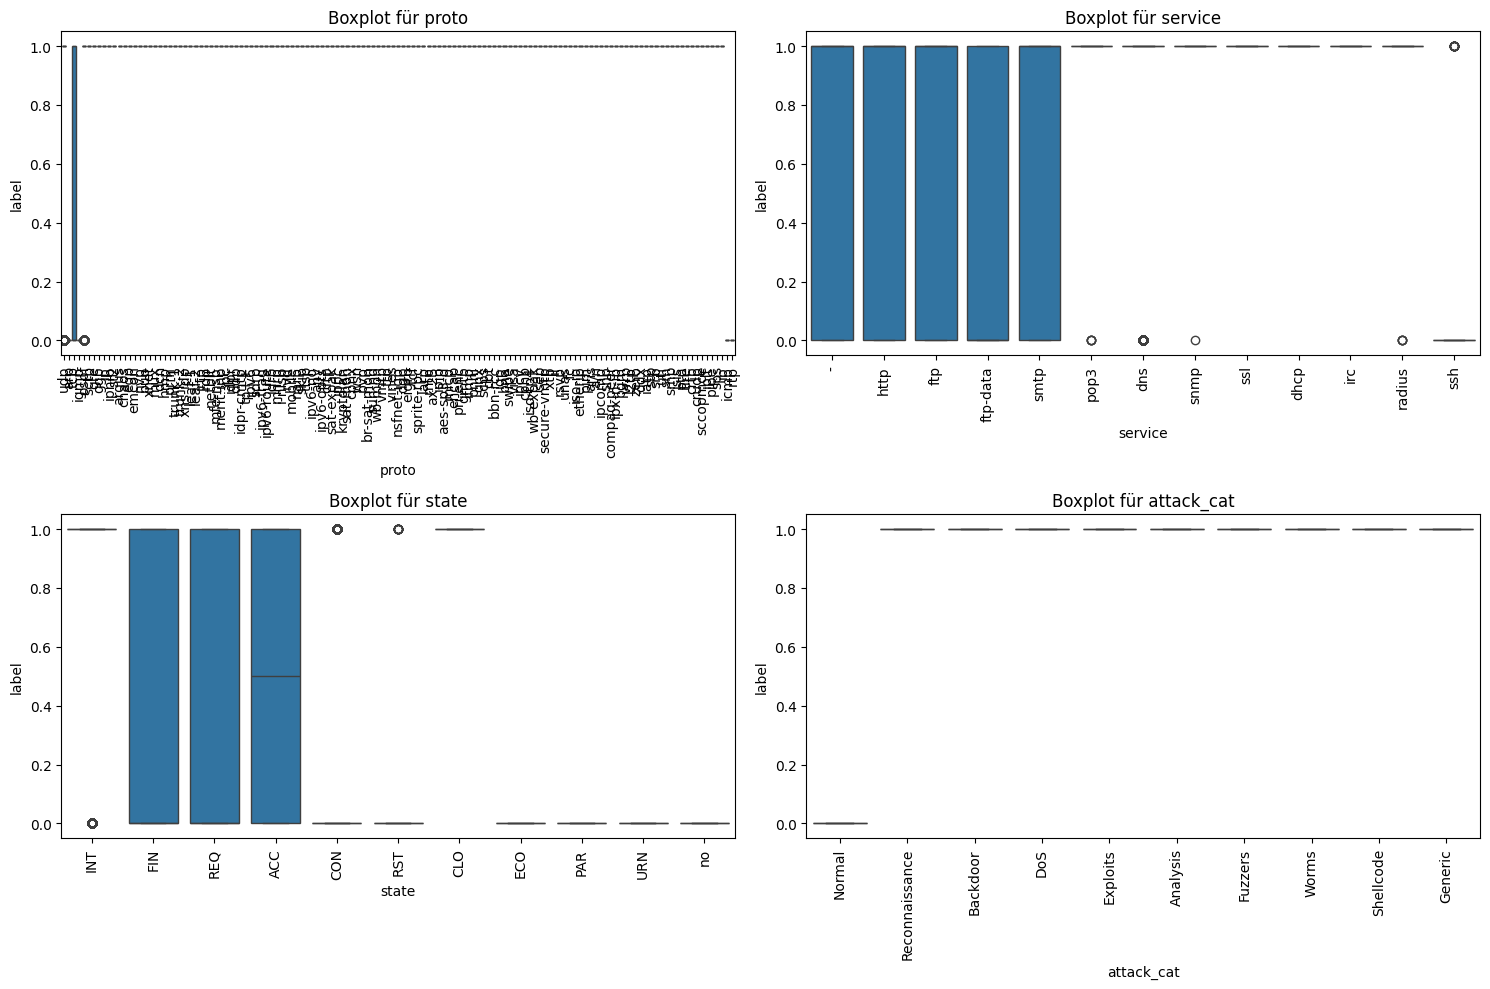

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


for i, feature in enumerate(df_not_num):
    row = i // 2  
    col = i % 2   
    sns.boxplot(x=feature, y='label', data=dataframe, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot für {feature}')
    axes[row, col].tick_params(axis='x', rotation=90)  
    
# Platz zwischen den Plots hinzufügen
plt.tight_layout()
plt.show()

In [15]:
dataframe.drop(dataframe.columns[dataframe.columns.str.contains('attack_cat', case=False)], axis=1, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  dinpkt 

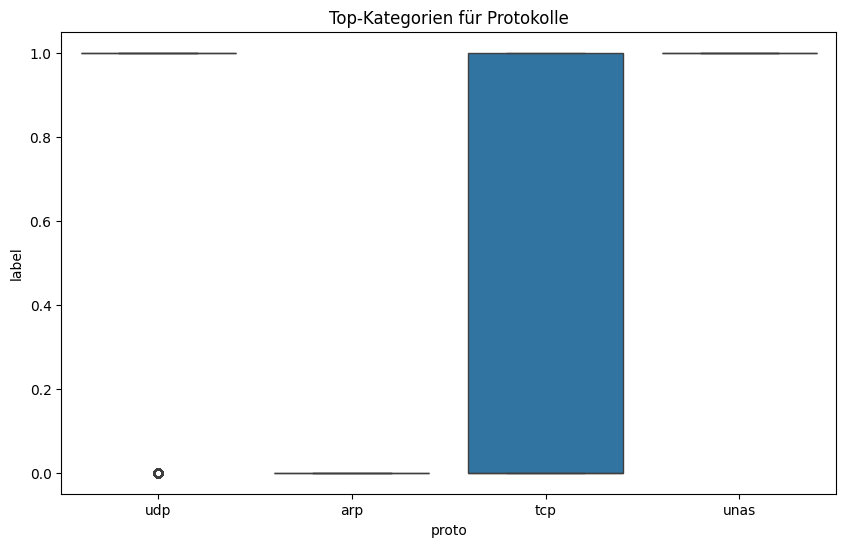

In [16]:
num_categories_to_display = 4

top_categories = dataframe['proto'].value_counts().nlargest(num_categories_to_display).index
df_filtered = dataframe[dataframe['proto'].isin(top_categories)]


plt.figure(figsize=(10, 6))
sns.boxplot(x='proto', y='label', data=df_filtered)
plt.title('Top-Kategorien für Protokolle')
#plt.xticks(rotation=90)  
plt.show()

In [17]:
pd.crosstab(index=dataframe['proto'], columns=dataframe['proto'])

proto      3pc  a/n  aes-sp3-d  any  argus  aris  arp  ax.25  bbn-rcc  bna  \
proto                                                                        
3pc        132    0          0    0      0     0    0      0        0    0   
a/n          0  132          0    0      0     0    0      0        0    0   
aes-sp3-d    0    0        132    0      0     0    0      0        0    0   
any          0    0          0  396      0     0    0      0        0    0   
argus        0    0          0    0    131     0    0      0        0    0   
...        ...  ...        ...  ...    ...   ...  ...    ...      ...  ...   
wsn          0    0          0    0      0     0    0      0        0    0   
xnet         0    0          0    0      0     0    0      0        0    0   
xns-idp      0    0          0    0      0     0    0      0        0    0   
xtp          0    0          0    0      0     0    0      0        0    0   
zero         0    0          0    0      0     0    0      0        0    0   

proto      ...  visa  vmtp  vrrp  wb-expak  wb-mon  wsn  xnet  xns-idp  xtp  \
proto      ...                                                                
3pc        ...     0     0     0         0       0    0     0        0    0   
a/n        ...     0     0     0         0       0    0     0        0    0   
aes-sp3-d  ...     0     0     0         0       0    0     0        0    0   
any        ...     0     0     0         0       0    0     0        0    0   
argus      ...     0     0     0         0       0    0     0        0    0   
...        ...   ...   ...   ...       ...     ...  ...   ...      ...  ...   
wsn        ...     0     0     0         0       0  132     0        0    0   
xnet       ...     0     0     0         0       0    0   132        0    0   
xns-idp    ...     0     0     0         0       0    0     0      133    0   
xtp        ...     0     0     0         0       0    0     0        0  132   
zero       ...     0     0     0         0       0    0     0        0    0   

proto      zero  
proto            
3pc           0  
a/n           0  
aes-sp3-d     0  
any           0  
argus         0  
...         ...  
wsn           0  
xnet          0  
xns-idp       0  
xtp           0  
zero        132  

[133 rows x 133 columns]

In [18]:
dtypes = dataframe.dtypes
categorical_features = dtypes[dtypes == 'object'].index.tolist()

In [19]:
nummerical_features = golden_features_list.index.tolist()

df_selected_features = dataframe[nummerical_features + categorical_features]

df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   label             257673 non-null  int64  
 1   sttl              257673 non-null  int64  
 2   ct_state_ttl      257673 non-null  int64  
 3   ct_dst_sport_ltm  257673 non-null  int64  
 4   rate              257673 non-null  float64
 5   ct_src_dport_ltm  257673 non-null  int64  
 6   ct_dst_src_ltm    257673 non-null  int64  
 7   ct_src_ltm        257673 non-null  int64  
 8   ct_srv_dst        257673 non-null  int64  
 9   ct_srv_src        257673 non-null  int64  
 10  ct_dst_ltm        257673 non-null  int64  
 11  sload             257673 non-null  float64
 12  dur               257673 non-null  float64
 13  sbytes            257673 non-null  int64  
 14  dttl              257673 non-null  int64  
 15  trans_depth       257673 non-null  int64  
 16  sloss             257673 

In [20]:
values_to_encode_proto      = ['tcp', 'udp', 'arp']
values_to_encode_service    = ['-', 'http', 'ftp', 'ftp-data', 'smtp']
values_to_encode_state      = ['FIN', 'ACC']

selected_rows_proto = df_selected_features[df_selected_features['proto'].isin(values_to_encode_proto)]


# dType: Object to float64
encoded_dataframe = pd.get_dummies(selected_rows_proto, columns=['proto'], prefix=["proto"], dtype=float)
selected_rows_service = encoded_dataframe[encoded_dataframe['service'].isin(values_to_encode_service)]

encoded_dataframe = pd.get_dummies(selected_rows_service, columns=['service'], prefix=["service"], dtype=float)
selected_rows_state = encoded_dataframe[encoded_dataframe['state'].isin(values_to_encode_state)]

encoded_dataframe = pd.get_dummies(selected_rows_state, columns=['state'], prefix=["state"], dtype=float)

encoded_dataframe.sample(10)

label  sttl  ct_state_ttl  ct_dst_sport_ltm         rate  \
486        0    31             0                 1   243.029478   
95840      1   254             1                 1    22.554496   
1451       1   254             1                 1    47.106379   
21957      0    31             0                 1  7909.568261   
77901      1   254             1                 1    20.268088   
8667       1    62             1                 1    21.022794   
73535      0   254             1                 1     1.488265   
64981      1   254             1                 1     8.720815   
47218      0   254             1                 1    19.142075   
30278      0    31             0                 1  6646.867432   

       ct_src_dport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  ct_srv_src  \
486                   3               3           8           3           3   
95840                 1               1           2           1           1   
1451                  1               1           1           1           1   
21957                 1               2           4           5           6   
77901                 1               3           1           3           3   
8667                  1               2           2           1           1   
73535                 1               1           1           1           4   
64981                 1               1           3           1           6   
47218                 1               3           1           3           3   
30278                 1               2           1           3           8   

       ...  proto_arp  proto_tcp  proto_udp  service_-  service_ftp  \
486    ...        0.0        1.0        0.0        1.0          0.0   
95840  ...        0.0        1.0        0.0        0.0          0.0   
1451   ...        0.0        1.0        0.0        1.0          0.0   
21957  ...        0.0        1.0        0.0        1.0          0.0   
77901  ...        0.0        1.0        0.0        1.0          0.0   
8667   ...        0.0        1.0        0.0        0.0          1.0   
73535  ...        0.0        1.0        0.0        1.0          0.0   
64981  ...        0.0        1.0        0.0        1.0          0.0   
47218  ...        0.0        1.0        0.0        1.0          0.0   
30278  ...        0.0        1.0        0.0        1.0          0.0   

       service_ftp-data  service_http  service_smtp  state_ACC  state_FIN  
486                 0.0           0.0           0.0        0.0        1.0  
95840               0.0           1.0           0.0        0.0        1.0  
1451                0.0           0.0           0.0        0.0        1.0  
21957               0.0           0.0           0.0        0.0        1.0  
77901               0.0           0.0           0.0        0.0        1.0  
8667                0.0           0.0           0.0        0.0        1.0  
73535               0.0           0.0           0.0        0.0        1.0  
64981               0.0           0.0           0.0        0.0        1.0  
47218               0.0           0.0           0.0        0.0        1.0  
30278               0.0           0.0           0.0        0.0        1.0  

[10 rows x 28 columns]

## Data processing

In [8]:

label_encoder = LabelEncoder()
dataframe['proto'] = label_encoder.fit_transform(dataframe['proto'])
dataframe['service'] = label_encoder.fit_transform(dataframe['service'])
dataframe['state'] = label_encoder.fit_transform(dataframe['state'])
dataframe['attack_cat'] = label_encoder.fit_transform(dataframe['attack_cat'])


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  int32  
 2   service            257673 non-null  int32  
 3   state              257673 non-null  int32  
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  dinpkt 

In [10]:
dataframe.sample(10)

dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
48721   0.900617    113        0      4     60     14   68183     612   
6184    0.042102    113        0      4     48     50    2974   30506   
67585   0.796660    113        0      4     12      8    1106     722   
38544   1.050096    113        5      4     14     18    1684   10168   
43820   0.651775    113        0      4     12      8    3678     354   
99372   1.086205    113        0      4     10      8     564     354   
81980   0.400396    113        0      4     10      6     742     268   
34360   3.587385    113        0      4    240    438   13766  548216   
121214  0.000006     43        0      5      2      0     180       0   
79342   0.985268    113        5      4     10     10     734     972   

                 rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
48721       81.055543   254  ...                 1               1   
6184      2303.928467    31  ...                 1               1   
67585       23.849572   254  ...                 1               4   
38544       29.521109    31  ...                 1               2   
43820       29.151164   254  ...                 1               1   
99372       15.650821   254  ...                 1               1   
81980       37.462913   254  ...                 1               4   
34360      188.716854    31  ...                 1               6   
121214  166666.660800   254  ...                 8              10   
79342       19.284093    62  ...                 1               1   

        is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
48721              0           0                 1           1           1   
6184               0           0                 0           3           8   
67585              0           0                 0           4           7   
38544              0           0                 1           3           1   
43820              0           0                 0           1           5   
99372              0           0                 0           4           1   
81980              0           0                 0           1           4   
34360              0           0                 0           3           7   
121214             0           0                 0           8          10   
79342              0           0                 0           1           1   

        is_sm_ips_ports  attack_cat  label  
48721                 0           4      1  
6184                  0           6      0  
67585                 0           6      0  
38544                 0           6      0  
43820                 0           4      1  
99372                 0           7      1  
81980                 0           6      0  
34360                 0           6      0  
121214                0           2      1  
79342                 0           6      0  

[10 rows x 44 columns]

In [11]:
dataframe = dataframe.astype(float)
dataframe['label'] = dataframe['label'].astype(int)


In [12]:
dataframe.sample(10)

dur  proto  service  state  spkts  dpkts  sbytes   dbytes  \
99368   3.607900  113.0      3.0    4.0   24.0   22.0  1272.0   1602.0   
52864   2.951486  113.0      0.0    4.0   18.0   20.0  1666.0   1724.0   
149753  1.235096  113.0      5.0    4.0   10.0   10.0   810.0   1248.0   
149321  0.000003  119.0      2.0    5.0    2.0    0.0   114.0      0.0   
27029   0.001075  119.0      2.0    2.0    2.0    2.0   146.0    178.0   
169399  0.000001  119.0      2.0    5.0    2.0    0.0   114.0      0.0   
9469    0.001191  119.0      2.0    2.0    2.0    2.0   132.0    164.0   
39434   0.099538  113.0      0.0    4.0   84.0   86.0  4862.0  79882.0   
105991  0.000009  100.0      0.0    5.0    2.0    0.0   200.0      0.0   
174958  0.000003  119.0      2.0    5.0    2.0    0.0   114.0      0.0   

                rate   sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
99368   1.247263e+01   62.0  ...               1.0             2.0   
52864   1.253606e+01   62.0  ...               1.0             4.0   
149753  1.538342e+01   62.0  ...               1.0             1.0   
149321  3.333333e+05  254.0  ...              16.0            20.0   
27029   2.790698e+03   31.0  ...               1.0             2.0   
169399  1.000000e+06  254.0  ...              10.0            10.0   
9469    2.518892e+03   31.0  ...               1.0             2.0   
39434   1.697844e+03   31.0  ...               1.0             1.0   
105991  1.111111e+05  254.0  ...               1.0             6.0   
174958  3.333333e+05  254.0  ...              16.0            31.0   

        is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
99368            1.0         1.0               0.0         3.0         1.0   
52864            0.0         0.0               0.0         6.0         4.0   
149753           0.0         0.0               1.0         1.0         1.0   
149321           0.0         0.0               0.0        16.0        20.0   
27029            0.0         0.0               0.0         4.0         3.0   
169399           0.0         0.0               0.0        11.0        10.0   
9469             0.0         0.0               0.0         2.0         6.0   
39434            0.0         0.0               0.0         5.0         9.0   
105991           0.0         0.0               0.0         1.0         6.0   
174958           0.0         0.0               0.0        17.0        31.0   

        is_sm_ips_ports  attack_cat  label  
99368               0.0         3.0      1  
52864               0.0         5.0      1  
149753              0.0         0.0      1  
149321              0.0         5.0      1  
27029               0.0         6.0      0  
169399              0.0         5.0      1  
9469                0.0         6.0      0  
39434               0.0         6.0      0  
105991              0.0         3.0      1  
174958              0.0         5.0      1  

[10 rows x 44 columns]

In [13]:
label_column = dataframe['label']
dataframe = dataframe.drop(columns=['label'])
dataframe.insert(0, 'label', label_column)

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   label              257673 non-null  int32  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  float64
 3   service            257673 non-null  float64
 4   state              257673 non-null  float64
 5   spkts              257673 non-null  float64
 6   dpkts              257673 non-null  float64
 7   sbytes             257673 non-null  float64
 8   dbytes             257673 non-null  float64
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  float64
 11  dttl               257673 non-null  float64
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  float64
 15  dloss              257673 non-null  float64
 16  sinpkt 

## 2 Training and Testing 

In [15]:
#raw_data = encoded_dataframe.values # old data processing
raw_data = dataframe.values

In [16]:
labels = raw_data[:, 0]
train_data, test_data, train_labels, test_labels = train_test_split(raw_data, labels, test_size=0.2, random_state=21)

train_data[2]

array([0.00000000e+00, 2.24303600e+00, 1.13000000e+02, 0.00000000e+00,
       4.00000000e+00, 1.60000000e+01, 1.80000000e+01, 1.54000000e+03,
       1.64400000e+03, 1.47122020e+01, 3.10000000e+01, 2.90000000e+01,
       5.15016260e+03, 5.53892139e+03, 4.00000000e+00, 4.00000000e+00,
       1.49508672e+02, 1.28636820e+02, 1.02525253e+04, 3.10742125e+02,
       2.55000000e+02, 2.88242681e+09, 1.39105856e+09, 2.55000000e+02,
       2.50003000e-01, 5.62090000e-02, 1.93794000e-01, 9.60000000e+01,
       9.10000000e+01, 0.00000000e+00, 0.00000000e+00, 1.10000000e+01,
       0.00000000e+00, 6.00000000e+00, 1.00000000e+01, 1.00000000e+00,
       3.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.20000000e+01, 6.00000000e+00, 0.00000000e+00, 6.00000000e+00])

In [17]:
len(train_data[1])

44

In [18]:

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)


train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

#data = raw_data[:, 1:]
normal_train_data[2]
print("train_data :",len(train_data))
print("test_data :",len(test_data))
print("normal train_data :",len(normal_train_data))
print("normal_test_data :",len(normal_test_data))
print("anormalous train_data :",len(anomalous_train_data))
print("anormalous test_data :",len(anomalous_test_data))

train_data : 206138
test_data : 51535
normal train_data : 131784
normal_test_data : 32889
anormalous train_data : 74354
anormalous test_data : 18646


#### setting training and test  data labels

In [19]:
normal_train_data_labels = normal_train_data[:, 0]
normal_test_data_labels = normal_test_data[:, 0]

anomalous_train_data_labels = anomalous_train_data[:, 0] 
anomalous_test_data_labels = anomalous_test_data[:, 0]

anomalous_test_data_labels[1]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### removing labels from test and training data

In [20]:
normal_train_data_wl = normal_train_data[:, 1:]
normal_test_data_wl = normal_test_data[:, 1:]

anomalous_train_data_wl = anomalous_train_data[:, 1:]
anomalous_test_data_wl = anomalous_test_data[:, 1:]

normal_train_data_wl[2]

<tf.Tensor: shape=(43,), dtype=float32, numpy=
array([2.7744901e-01, 1.1300000e+02, 5.0000000e+00, 4.0000000e+00,
       1.0000000e+01, 1.2000000e+01, 8.4600000e+02, 8.2720000e+03,
       7.5689583e+01, 6.2000000e+01, 2.5200000e+02, 2.1971605e+04,
       2.1864919e+05, 2.0000000e+00, 4.0000000e+00, 3.0827667e+01,
       2.4510637e+01, 1.5060221e+03, 1.9817128e+03, 2.5500000e+02,
       4.1905080e+09, 1.5993216e+09, 2.5500000e+02, 5.4171000e-02,
       7.0949998e-03, 4.7076002e-02, 8.5000000e+01, 6.8900000e+02,
       1.0000000e+00, 3.6310000e+03, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 3.0000000e+00], dtype=float32)>

#### normalise training and test data

In [21]:
min_val_normal_train = tf.reduce_min(normal_train_data_wl)
max_val_normal_train = tf.reduce_max(normal_train_data_wl)


min_val_normal_test = tf.reduce_min(normal_test_data_wl)
max_val_normal_test = tf.reduce_max(normal_test_data_wl)

min_val_anormalous_train = tf.reduce_min(anomalous_train_data_wl)
max_val_anormalous_train = tf.reduce_max(anomalous_train_data_wl)

min_val_anormalous_test = tf.reduce_min(anomalous_test_data_wl)
max_val_anormalous_test = tf.reduce_max(anomalous_test_data_wl)


# normal_train_data_wl tf.Tensor(0.0, shape=(), dtype=float32)
# normal_train_data_wl tf.Tensor(11631181.0, shape=(), dtype=float32)

#### normalisation using standard scaler (normalisation 1)

In [28]:

scaler = StandardScaler()

normal_train_data_wl_normalized = scaler.fit_transform(normal_train_data_wl)
normal_test_data_wl_normalized = scaler.fit_transform(normal_test_data_wl)

anomalous_train_data_wl_normalized =  scaler.fit_transform(anomalous_train_data_wl)
anomalous_test_data_wl_normalized =  scaler.fit_transform(anomalous_test_data_wl)

#### normalisation using MinMaxScaler (normalisation 2)

In [28]:

scaler = MinMaxScaler()

normal_train_data_wl_normalized = scaler.fit_transform(normal_train_data_wl)
normal_test_data_wl_normalized = scaler.fit_transform(normal_test_data_wl)

anomalous_train_data_wl_normalized =  scaler.fit_transform(anomalous_train_data_wl)
anomalous_test_data_wl_normalized =  scaler.fit_transform(anomalous_test_data_wl)

#### simple normalise  (normalisation 3)

In [28]:
normal_train_data_wl_normalized = (normal_train_data_wl - min_val_normal_train)/ (max_val_normal_train - min_val_normal_train)
normal_test_data_wl_normalized = (normal_test_data_wl - min_val_normal_train)/ (max_val_normal_test- min_val_normal_test)

anomalous_train_data_wl_normalized = (anomalous_train_data_wl - min_val_normal_train)/ (max_val_anormalous_train- min_val_anormalous_train)
anomalous_test_data_wl_normalized = (anomalous_test_data_wl - min_val_normal_train)/ (max_val_anormalous_test- min_val_anormalous_test)


normal_train_data_wl_normalized[10]


<tf.Tensor: shape=(27,), dtype=float32, numpy=
array([2.1837852e-05, 8.5975792e-08, 8.5975792e-08, 2.1894443e-06,
       1.7195158e-07, 1.7195158e-07, 1.7195158e-07, 4.2987895e-07,
       3.4390317e-07, 1.7195158e-07, 8.9790270e-04, 6.4146363e-08,
       9.1306290e-05, 2.1665899e-05, 0.0000000e+00, 2.5792738e-07,
       1.0211688e-08, 0.0000000e+00, 8.5975792e-08, 0.0000000e+00,
       8.5975792e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 8.5975792e-08], dtype=float32)>

In [21]:
normal_train_data_wl_normalized = tf.constant(normal_train_data_wl, dtype=tf.float32)
normal_test_data_wl_normalized = tf.constant(normal_test_data_wl, dtype=tf.float32)

anomalous_train_data_wl_normalized = tf.constant(anomalous_train_data_wl, dtype=tf.float32)
anomalous_test_data_wl_normalized = tf.constant(anomalous_test_data_wl, dtype=tf.float32)



# normal_train_data_wl_normalized = tf.constant(normal_train_data_wl_normalized, dtype=tf.float32)
# normal_test_data_wl_normalized = tf.constant(normal_test_data_wl_normalized, dtype=tf.float32)

# anomalous_train_data_wl_normalized = tf.constant(anomalous_train_data_wl_normalized, dtype=tf.float32)
# anomalous_test_data_wl_normalized = tf.constant(anomalous_test_data_wl_normalized, dtype=tf.float32)

normal_train_data_wl_normalized[2]


<tf.Tensor: shape=(43,), dtype=float32, numpy=
array([2.7744901e-01, 1.1300000e+02, 5.0000000e+00, 4.0000000e+00,
       1.0000000e+01, 1.2000000e+01, 8.4600000e+02, 8.2720000e+03,
       7.5689583e+01, 6.2000000e+01, 2.5200000e+02, 2.1971605e+04,
       2.1864919e+05, 2.0000000e+00, 4.0000000e+00, 3.0827667e+01,
       2.4510637e+01, 1.5060221e+03, 1.9817128e+03, 2.5500000e+02,
       4.1905080e+09, 1.5993216e+09, 2.5500000e+02, 5.4171000e-02,
       7.0949998e-03, 4.7076002e-02, 8.5000000e+01, 6.8900000e+02,
       1.0000000e+00, 3.6310000e+03, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 3.0000000e+00], dtype=float32)>

### plot data instance

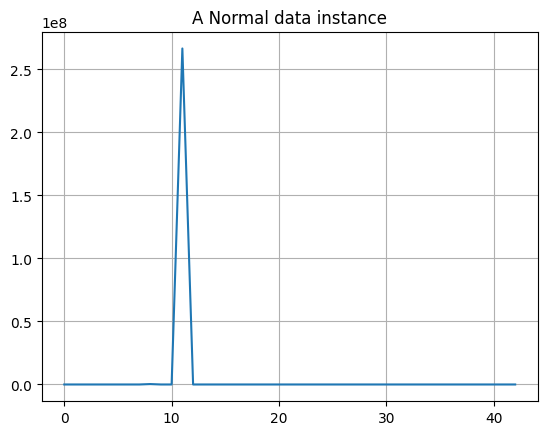

In [23]:
plt.grid()
plt.plot(np.arange(43), normal_train_data_wl_normalized[0])
plt.title("A Normal data instance")
plt.show()

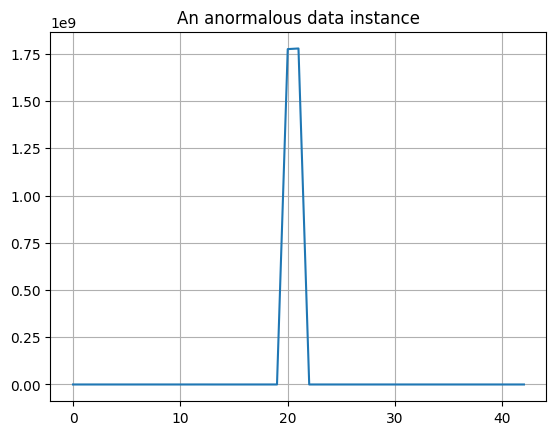

In [24]:
plt.grid()
plt.plot(np.arange(43), anomalous_test_data_wl_normalized[0])
plt.title("An anormalous data instance")
plt.show()

# unsupervised Contractive Autoencoder

In [25]:

class ContractiveAnomalyDetector(tf.keras.Model):
    def __init__(self, lam=1e-8 ): #, constant_value=10#
        super(ContractiveAnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(43, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(64, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(32, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(16, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(8, activation="relu"),
            layers.BatchNormalization()])

        self.decoder = tf.keras.Sequential([
            layers.Dense(8, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(16, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(32, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(64, activation="relu"),
            layers.BatchNormalization(),
            layers.Dense(43, activation="sigmoid")])

        self.lam = lam  # Regularization strength
        #self.constant_value = constant_value

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def compute_jacobian(self, x):
        x = tf.convert_to_tensor(x)  # Ensure x is a tf.Tensor
    
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            encoded = self.encoder(x)
    
        jacobian = tape.jacobian(encoded, x)
        
        return jacobian

    
    def contractive_loss(self, x, x_hat, jacobian):
        mse_loss = tf.reduce_mean(tf.square(x - x_hat))
        squared_jacobian = tf.square(jacobian)
        frobenius_norm = tf.sqrt(tf.reduce_sum(squared_jacobian))        
        # Combine the losses
        total_loss = mse_loss + self.lam * frobenius_norm # + self.constant_value
        return total_loss       

  

In [26]:
    def train_step(self, data):
        x, _ = data
        with tf.GradientTape() as tape:
            x_hat = self(x)
            jacobian = self.compute_jacobian(x)
            loss = self.contractive_loss(x, x_hat, jacobian)
            
        gradients = tape.gradient(loss, self.trainable_variables)
        clipped_gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)        
        self.optimizer.apply_gradients(zip(clipped_gradients, self.trainable_variables))

        return {"loss": loss}
# The compute_jacobian method calculates the Jacobian matrix of the encoded representation with respect to the input.

# The contractive_loss method computes the contractive loss, which is a combination of the mean squared error (MSE) reconstruction loss and the Frobenius norm of the Jacobian matrix.

# The train_step method is overridden to include the contractive loss during training.


In [27]:
contractive_autoencoder = ContractiveAnomalyDetector()
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.09,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

contractive_autoencoder.compile(optimizer=optimizer, loss='mse')

In [28]:
contractive_autoencoder.build(input_shape = (None, 43))
contractive_autoencoder.summary()


Model: "contractive_anomaly_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 8)                 8104      
                                                                 
 sequential_1 (Sequential)   (None, 43)                6147      
                                                                 
Total params: 14251 (55.67 KB)
Trainable params: 13685 (53.46 KB)
Non-trainable params: 566 (2.21 KB)
_________________________________________________________________


In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True)

history = contractive_autoencoder.fit(
    normal_train_data_wl_normalized,
    normal_train_data_wl_normalized,
    epochs=50,
    batch_size=512,
    validation_data=(normal_test_data_wl_normalized, normal_test_data_wl_normalized),
    shuffle=True,
    callbacks=[early_stopping])


Epoch 1/50

258/258 [==============================] - 9s 13ms/step - loss: 98695118646673408.0000 - val_loss: 98417002334388224.0000
Epoch 2/50
258/258 [==============================] - 3s 11ms/step - loss: 98695110056738816.0000 - val_loss: 98417002334388224.0000
Epoch 3/50
258/258 [==============================] - 3s 10ms/step - loss: 98695127236608000.0000 - val_loss: 98417002334388224.0000
Epoch 4/50
258/258 [==============================] - 3s 10ms/step - loss: 98695135826542592.0000 - val_loss: 98417002334388224.0000
Epoch 5/50
258/258 [==============================] - 3s 11ms/step - loss: 98695118646673408.0000 - val_loss: 98417002334388224.0000
Epoch 6/50
258/258 [==============================] - 3s 11ms/step - loss: 98695127236608000.0000 - val_loss: 98417002334388224.0000
Epoch 7/50
258/258 [==============================] - 3s 10ms/step - loss: 98695118646673408.0000 - val_loss: 98417002334388224.0000
Epoch 8/50
258/258 [==============================] - 3s 10ms/step -

### Training curve

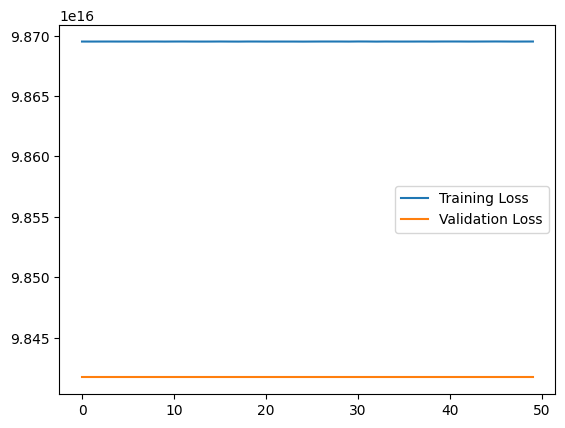

In [31]:
# tensorboard
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
# Save the plot as an image
#plt.savefig('training_loss_plot_contractiveautoencoder_min_max_normalise.png')

### normal sample reconstruction

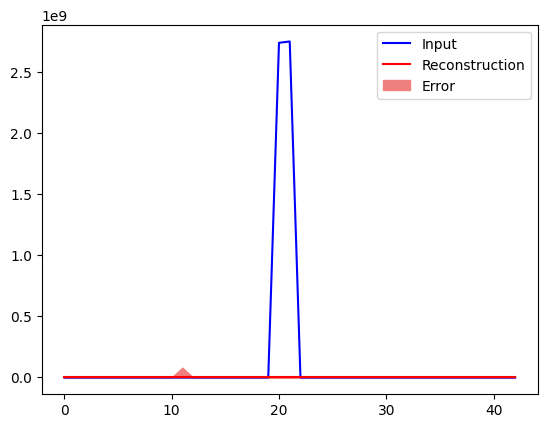

In [33]:
encoded_data = contractive_autoencoder.encoder(normal_test_data_wl_normalized).numpy()
decoded_data = contractive_autoencoder.decoder(encoded_data).numpy()
#Normal test sample
plt.plot(normal_test_data_wl_normalized[4], 'b')
plt.plot(decoded_data[4], 'r')
plt.fill_between(np.arange(43), decoded_data[1], normal_test_data_wl_normalized[1], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()
#plt.savefig('reconstruction_error_normal_test_data_plot_contractiveautoencoder_min_max_normalise.png')

### anormal sample reconstruction

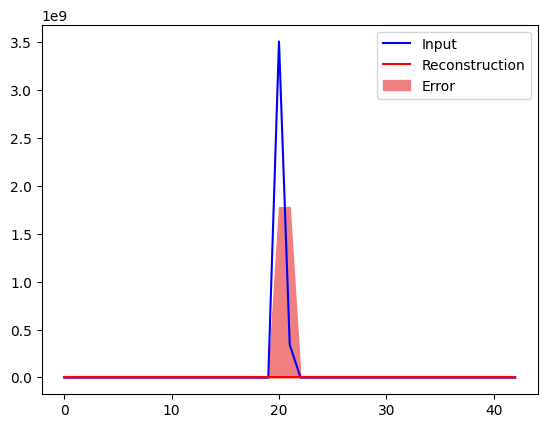

In [34]:
encoded_data = contractive_autoencoder.encoder(anomalous_test_data_wl_normalized).numpy()
decoded_data = contractive_autoencoder.decoder(encoded_data).numpy()
# anomaly data sample
plt.plot(anomalous_test_data_wl_normalized[3], 'b')
plt.plot(decoded_data[3], 'r')
plt.fill_between(np.arange(43), decoded_data[0], anomalous_test_data_wl_normalized[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
# plt.xlabel("Train loss")
# plt.ylabel("No of examples")
plt.show()
#plt.savefig('reconstruction_error_anormal_test_data_plot_contractiveautoencoder_min_max_normalise.png')

### anomal and normal reconstruction

583/583 [==============================] - 2s 3ms/step


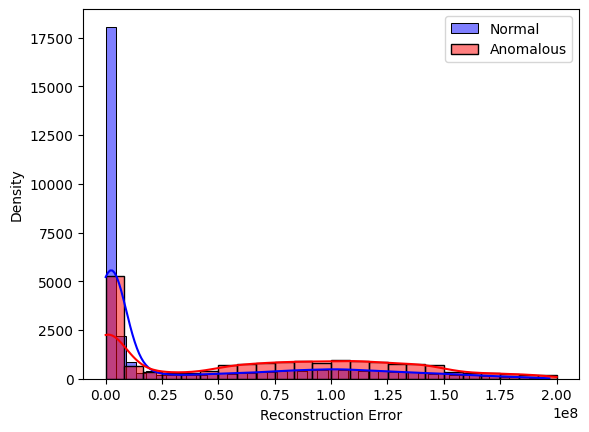

In [35]:
reconstructions_normal = contractive_autoencoder.predict(normal_test_data_wl_normalized)
reconstructions_anomalous = contractive_autoencoder.predict(anomalous_test_data_wl_normalized)

errors_normal = np.mean(np.abs(reconstructions_normal - normal_test_data_wl_normalized), axis=1)
errors_anomalous = np.mean(np.abs(reconstructions_anomalous - anomalous_test_data_wl_normalized), axis=1)

sns.histplot(errors_normal, label='Normal', kde=True, color='blue')
sns.histplot(errors_anomalous, label='Anomalous', kde=True, color='red')
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.show()
#plt.savefig('contractiveautoencoder_min_max_normalise_density_distruibution_normal_and_anormal.png')

#### normal training data reconstruction

1028/1028 [==============================] - 4s 3ms/step


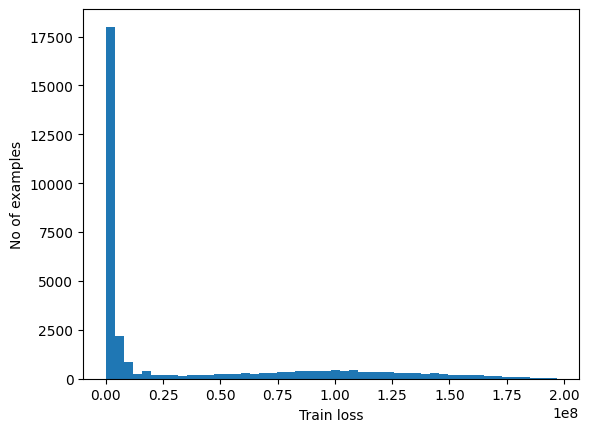

In [36]:
reconstructions = contractive_autoencoder.predict(normal_test_data_wl_normalized)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data_wl_normalized)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

#### threshold setting

In [37]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  87819700.0


#### anormal training data reconstruction

583/583 [==============================] - 2s 3ms/step


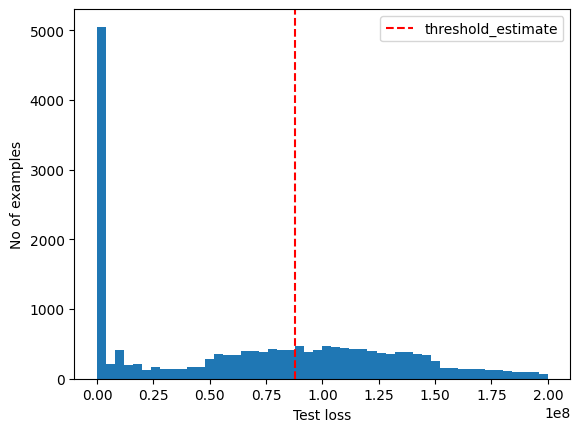

In [38]:
reconstructions = contractive_autoencoder.predict(anomalous_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_wl_normalized)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
# Add a vertical line at the threshold value
plt.axvline(x=threshold, color='r', linestyle='--', label='threshold_estimate')
plt.legend()
plt.show()
#plt.savefig('testdata_test_loss_plot_contractiveautoencoder_min_max_normalise.png')

#### display threshold anormalie samples

In [39]:
anomalies_indices = np.where(test_loss > threshold)[0]
num_anomalies_to_display = 5

for i, index in enumerate(anomalies_indices):
    print(f"Anomaly {index} - Index: {index}, Label: {test_labels[index]}")
    print("Sample:", test_data[index])
    print("  ")

    if i == num_anomalies_to_display - 1:
        break

print("Total anomalies in the dataset:", len(anomalies_indices))
print("Total normal in the anomalous_test_data:", len(test_loss) - len(anomalies_indices))


Anomaly 1 - Index: 1, Label: True
Sample: tf.Tensor(
[1.0000000e+00 6.0000002e-06 1.2200000e+02 0.0000000e+00 5.0000000e+00
 2.0000000e+00 0.0000000e+00 2.0000000e+02 0.0000000e+00 1.6666666e+05
 2.5400000e+02 0.0000000e+00 1.3333333e+08 0.0000000e+00 0.0000000e+00
 0.0000000e+00 6.0000001e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+02 0.0000000e+00 0.0000000e+00
 0.0000000e+00 4.0000000e+00 2.0000000e+00 2.0000000e+00 2.0000000e+00
 2.0000000e+00 4.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.1000000e+01 4.0000000e+00 0.0000000e+00 3.0000000e+00], shape=(44,), dtype=float32)
  
Anomaly 2 - Index: 2, Label: True
Sample: tf.Tensor(
[1.00e+00 1.00e-05 1.20e+02 0.00e+00 5.00e+00 2.00e+00 0.00e+00 2.00e+02
 0.00e+00 1.00e+05 2.54e+02 0.00e+00 8.00e+07 0.00e+00 0.00e+00 0.00e+00
 1.00e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+0

In [40]:
def predict_anomaly(model, data_instance, threshold):
    data_instance = tf.expand_dims(data_instance, axis=0)

    reconstructed_instance = model(data_instance)

    mse_loss = tf.reduce_mean(tf.square(data_instance - reconstructed_instance))

    if mse_loss > threshold:
        result = "Anomaly"
    else:
        result = "Normal"

    return result

In [41]:
prediction  = predict_anomaly(contractive_autoencoder, normal_test_data_wl_normalized[0], threshold)
print(f"The data instance is predicted as {prediction}.")

prediction_2  = predict_anomaly(contractive_autoencoder, anomalous_test_data_wl_normalized[9], threshold)
print(f"The data instance is predicted as {prediction}.")

The data instance is predicted as Anomaly.
The data instance is predicted as Anomaly.


583/583 [==============================] - 2s 4ms/step


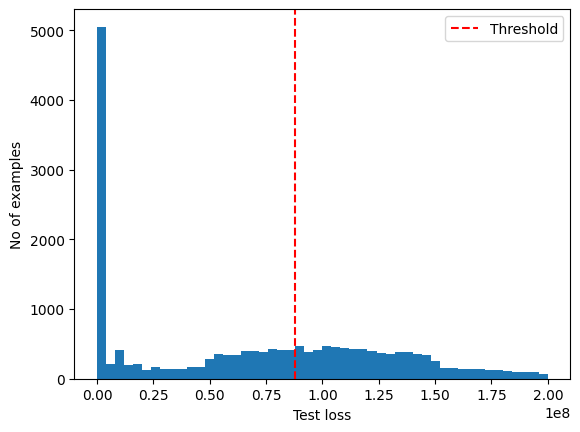

In [42]:
# 
reconstructions = contractive_autoencoder.predict(anomalous_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_wl_normalized)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
# Add a vertical line at the threshold value
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')

plt.legend()
plt.show()

In [43]:
anomaly_count = 0
max_display_count = 5
normaly_count = 0

for i, (sample, label) in enumerate(zip(test_data, test_labels)):
    if label == 1:  # Anomaly label
        anomaly_count += 1
    if label == 0:  # nomaly label
        normaly_count += 1   
        
        # Display the first 5 anomalies
        if anomaly_count <= max_display_count:
            print(f"Anomaly {anomaly_count} - Index: {i}, Label: {label}")
            print("Sample:", sample)
            print("------")

print("Total anomalies in the dataset:", anomaly_count)
print("Total nomal in the dataset:", normaly_count)


Anomaly 0 - Index: 0, Label: False
Sample: tf.Tensor(
[0.0000000e+00 1.0116630e+00 1.1300000e+02 5.0000000e+00 4.0000000e+00
 1.4000000e+01 1.8000000e+01 1.6840000e+03 1.0168000e+04 3.0642616e+01
 3.1000000e+01 2.9000000e+01 1.2367755e+04 7.5946242e+04 3.0000000e+00
 5.0000000e+00 7.7792389e+01 5.9477470e+01 8.7660996e+03 7.6754478e+03
 2.5500000e+02 1.7749827e+09 1.7782729e+09 2.5500000e+02 6.5800000e-04
 5.3700001e-04 1.2100000e-04 1.2000000e+02 5.6500000e+02 1.0000000e+00
 3.9240000e+03 3.0000000e+00 0.0000000e+00 3.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 4.0000000e+00 1.0000000e+00 0.0000000e+00 6.0000000e+00], shape=(44,), dtype=float32)
------
Anomaly 5 - Index: 6, Label: False
Sample: tf.Tensor(
[0.00000000e+00 1.28652203e+00 1.13000000e+02 0.00000000e+00
 4.00000000e+00 1.20000000e+01 8.00000000e+00 9.82000000e+02
 7.10000000e+02 1.47685003e+01 2.54000000e+02 2.52000000e+02
 5.60270215e+03 3.86779224e+03 3.00000000e+00 2

In [44]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [45]:
print('contractive autoencoder:')
print("Threshold: ", threshold)
preds = predict(contractive_autoencoder, normal_test_data_wl_normalized, threshold)
print_stats(preds, normal_test_data_labels)

contractive autoencoder:
Threshold:  87819700.0
Accuracy = 0.7905682751071786
Precision = 1.0
Recall = 0.7905682751071786


In [58]:
# train_data : 30936
# test_data : 7734
# normal train_data : 11720
# normal_test_data : 2975
# anormalous train_data : 19216
# anormalous test_data : 4759
# setting training and test dat

# unsupervised Sparse Autoencoder

In [51]:
class SparseAnomalyDetector(tf.keras.Model):
    def __init__(self, num_features, encoding_dim, sparsity_factor=1e-2):
        super(SparseAnomalyDetector, self).__init__()

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(num_features,)),
            layers.Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(sparsity_factor)),
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(encoding_dim,)),
            layers.Dense(num_features, activation="sigmoid"),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

num_features = 43
encoding_dim = 8  
sparsity_factor = 1e-2 

sparse_autoencoder = SparseAnomalyDetector(num_features=num_features, encoding_dim=encoding_dim, sparsity_factor=sparsity_factor)


In [52]:
sparse_autoencoder.compile(optimizer='adam', loss='mae')

In [53]:
sparse_autoencoder.build(input_shape=(None, 43))
sparse_autoencoder.summary()

Model: "sparse_anomaly_detector_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 8)                 352       
                                                                 
 sequential_5 (Sequential)   (None, 43)                387       
                                                                 
Total params: 739 (2.89 KB)
Trainable params: 739 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
history_sparse = sparse_autoencoder.fit(normal_train_data_wl_normalized, normal_train_data_wl_normalized, 
          epochs=50, 
          batch_size=512,
          validation_data=(normal_test_data_wl_normalized, normal_test_data_wl_normalized),
          shuffle=True)

Epoch 1/50
258/258 [==============================] - 2s 5ms/step - loss: 41111184.0000 - val_loss: 36523152.0000
Epoch 2/50
258/258 [==============================] - 1s 4ms/step - loss: 36417480.0000 - val_loss: 36115500.0000
Epoch 3/50
258/258 [==============================] - 1s 3ms/step - loss: 36279488.0000 - val_loss: 36089860.0000
Epoch 4/50
258/258 [==============================] - 1s 4ms/step - loss: 36272144.0000 - val_loss: 36089128.0000
Epoch 5/50
258/258 [==============================] - 1s 4ms/step - loss: 36272000.0000 - val_loss: 36089124.0000
Epoch 6/50
258/258 [==============================] - 1s 4ms/step - loss: 36271992.0000 - val_loss: 36089124.0000
Epoch 7/50
258/258 [==============================] - 1s 3ms/step - loss: 36271992.0000 - val_loss: 36089124.0000
Epoch 8/50
258/258 [==============================] - 1s 3ms/step - loss: 36271996.0000 - val_loss: 36089124.0000
Epoch 9/50
258/258 [==============================] - 1s 3ms/step - loss: 36272004.0000 

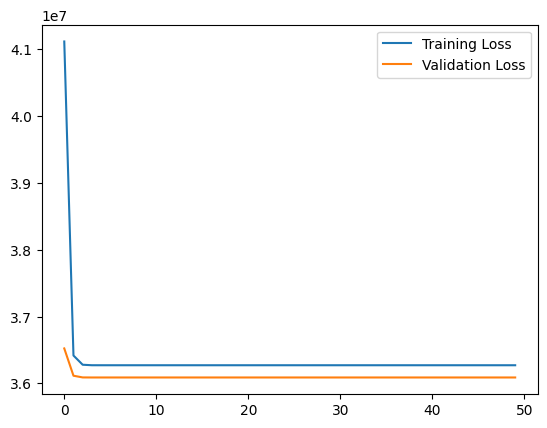

In [55]:
# tensorboard
plt.plot(history_sparse.history["loss"], label="Training Loss")
plt.plot(history_sparse.history["val_loss"], label="Validation Loss")
plt.legend()

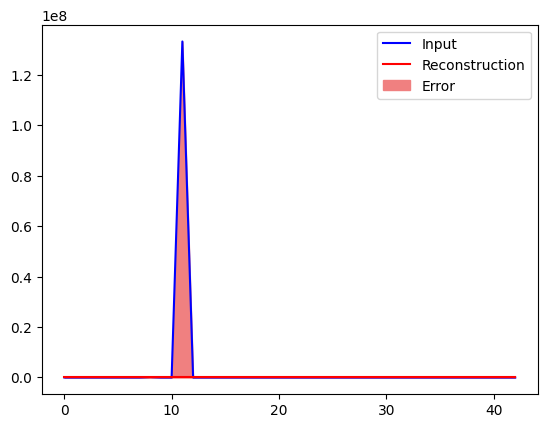

In [56]:
encoded_data = sparse_autoencoder.encoder(normal_test_data_wl_normalized).numpy()
decoded_data = sparse_autoencoder.decoder(encoded_data).numpy()
#Normal test sample
plt.plot(normal_test_data_wl_normalized[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(43), decoded_data[0], normal_test_data_wl_normalized[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

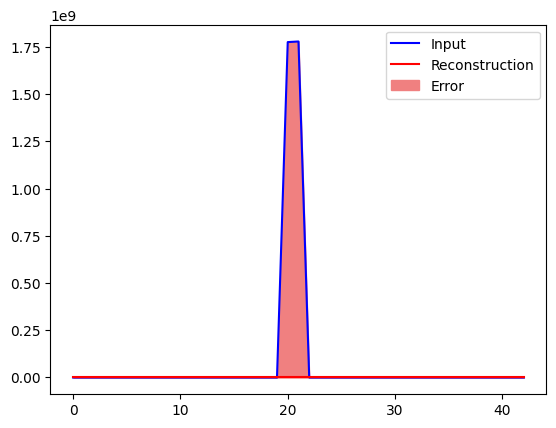

In [57]:
encoded_data = sparse_autoencoder.encoder(anomalous_test_data_wl_normalized).numpy()
decoded_data = sparse_autoencoder.decoder(encoded_data).numpy()
# anomaly data sample
plt.plot(anomalous_test_data_wl_normalized[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(43), decoded_data[0], anomalous_test_data_wl_normalized[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

4119/4119 [==============================] - 8s 2ms/step


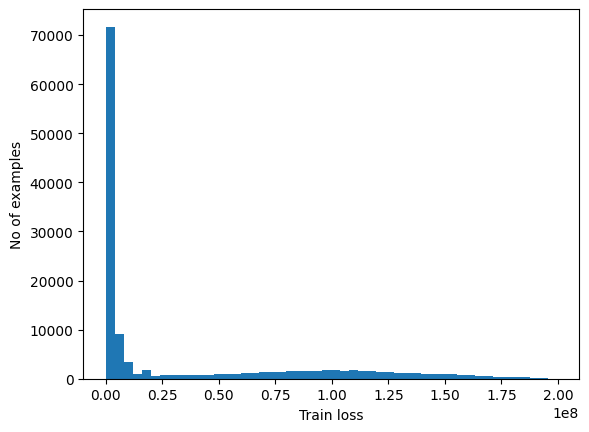

In [58]:
reconstructions = sparse_autoencoder.predict(normal_train_data_wl_normalized)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data_wl_normalized)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

583/583 [==============================] - 1s 2ms/step
Threshold:  88075800.0


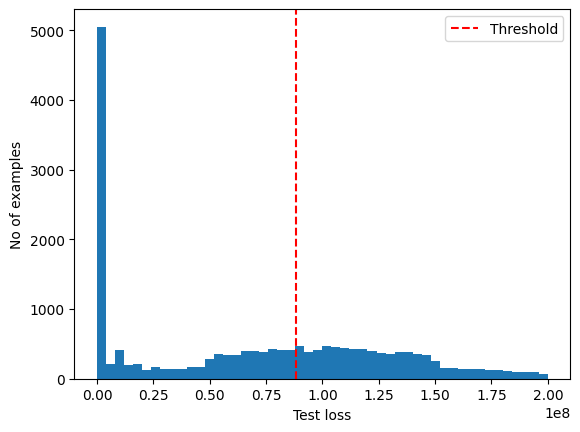

In [59]:
reconstructions = sparse_autoencoder.predict(anomalous_test_data_wl_normalized)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_wl_normalized)

# threshold setting other methods can be used 
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
# Add a vertical line at the threshold value
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')

plt.legend()
plt.show()

In [60]:
def predict_anomaly(model, data_instance, threshold):
    data_instance = tf.expand_dims(data_instance, axis=0)

    reconstructed_instance = model(data_instance)

    mse_loss = tf.reduce_mean(tf.square(data_instance - reconstructed_instance))

    if mse_loss > threshold:
        result = "Anomaly"
    else:
        result = "Normal"

    return result

In [61]:
prediction  = predict_anomaly(sparse_autoencoder, normal_test_data_wl_normalized[0], threshold)
print(f"The data instance is predicted as {prediction}.")

The data instance is predicted as Anomaly.


In [62]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [63]:
print('sparse autoencoder')
print("Threshold: ", threshold)
preds = predict(sparse_autoencoder, normal_test_data_wl_normalized, threshold)
print_stats(preds, normal_test_data_labels)

sparse autoencoder
Threshold:  88075800.0
Accuracy = 0.7914196235823527
Precision = 1.0
Recall = 0.7914196235823527


# unsupervised LOF( Local Outlier Factor) Algorithmus zur Anomalieerkennung

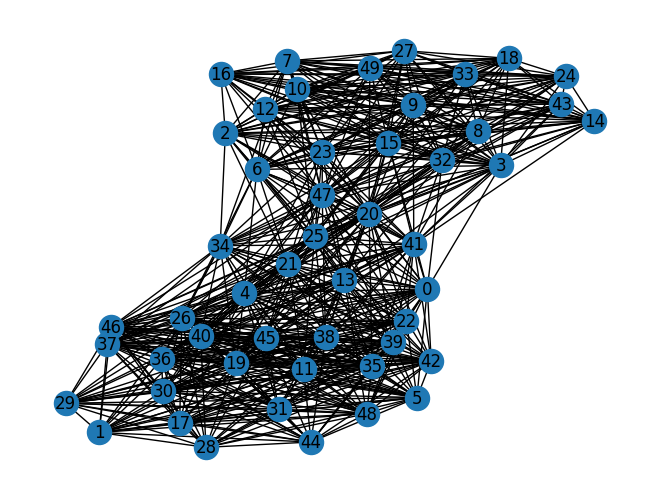


Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.38      0.98      0.54     18675
           1       0.88      0.07      0.13     32860

    accuracy                           0.40     51535
   macro avg       0.63      0.53      0.34     51535
weighted avg       0.70      0.40      0.28     51535



In [26]:

df = dataframe
y_true = dataframe['label']
X = df.iloc[:, 1:]  # Features
n_neighbors=20


X_train, X_test, y_true_train, y_true_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

lof = LocalOutlierFactor(n_neighbors, contamination=0.05) 
y_pred_train = lof.fit_predict(X_train)

y_pred_binary_train = np.where(y_pred_train == -1, 1, 0)



y_pred_test = lof.fit_predict(X_test)

y_pred_binary_test = np.where(y_pred_test == -1, 1, 0)



sample_size = 50
sampled_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
sampled_graph = kneighbors_graph(X_train.iloc[sampled_indices], n_neighbors)

dense_sampled_graph = sampled_graph.toarray()

G = nx.Graph(dense_sampled_graph)

nx.draw(G, with_labels=True)
plt.show()

classification_rep_test = classification_report(y_true_test, y_pred_binary_test)
print("\nClassification Report for Test Data:\n", classification_rep_test)

In [79]:
original_data_point_index = 32

corresponding_datapoint = X_train.iloc[original_data_point_index]

is_anomaly = y_pred_binary[sampled_indices[original_data_point_index]] == 1

print(f"Corresponding Datapoint for Graph Point {original_data_point_index}:\n{corresponding_datapoint}")
print(f"Is Anomaly: {is_anomaly}")


Corresponding Datapoint for Graph Point 32:
dur                  1.100000e-05
proto                1.170000e+02
service              0.000000e+00
state                4.000000e+00
spkts                2.000000e+00
dpkts                0.000000e+00
sbytes               1.882000e+03
dbytes               0.000000e+00
rate                 9.090909e+04
sttl                 2.540000e+02
dttl                 0.000000e+00
sload                6.843636e+08
dload                0.000000e+00
sloss                0.000000e+00
dloss                0.000000e+00
sinpkt               1.100000e-02
dinpkt               0.000000e+00
sjit                 0.000000e+00
djit                 0.000000e+00
swin                 0.000000e+00
stcpb                0.000000e+00
dtcpb                0.000000e+00
dwin                 0.000000e+00
tcprtt               0.000000e+00
synack               0.000000e+00
ackdat               0.000000e+00
smean                9.410000e+02
dmean                0.000000e+00
tran

## unsupervised Clustering K-Means

In [18]:
def optimise_k_means(data, max_k):
    means =[]
    inertias = []
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias,'o-')
    plt.ylabel('Inertia')
    plt.xlabel('number of clusters')
    plt.grid(True)
    plt.show()

def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, marker='o')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [27]:
data_for_clustering = raw_data
#data_for_clustering = data_for_clustering.drop('label', axis=1)   
max_k = 10

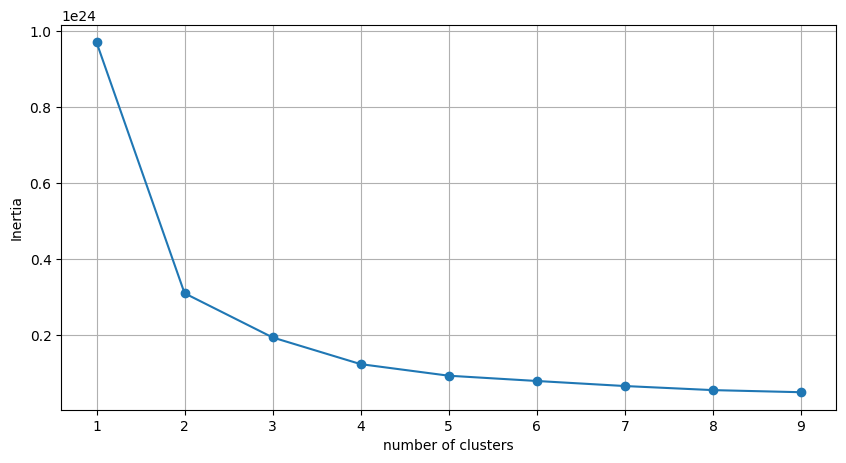

In [29]:
# Perform k-means clustering
optimise_k_means(data_for_clustering, max_k)

In [30]:
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k,n_init=10)

In [31]:
cluster_labels = kmeans.fit_predict(data_for_clustering)

In [32]:
data_for_clustering

array([[0.00e+00, 1.10e-05, 1.19e+02, ..., 2.00e+00, 0.00e+00, 6.00e+00],
       [0.00e+00, 8.00e-06, 1.19e+02, ..., 2.00e+00, 0.00e+00, 6.00e+00],
       [0.00e+00, 5.00e-06, 1.19e+02, ..., 3.00e+00, 0.00e+00, 6.00e+00],
       ...,
       [1.00e+00, 9.00e-06, 1.19e+02, ..., 1.20e+01, 0.00e+00, 5.00e+00],
       [1.00e+00, 9.00e-06, 1.19e+02, ..., 3.00e+01, 0.00e+00, 5.00e+00],
       [1.00e+00, 9.00e-06, 1.19e+02, ..., 3.00e+01, 0.00e+00, 5.00e+00]])

In [ ]:
silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")

In [ ]:
threshold = 0.5  #  threshold can be adjusted based on your data and silhouette score distribution
data_for_clustering['label'] = 'normal'
data_for_clustering.loc[silhouette_avg < threshold, 'label'] = 'anomaly'

In [ ]:
# Split the data
X = data_for_clustering.drop(['label'], axis=1)
y = data_for_clustering['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:

# Train a classifier
classifier = LogisticRegression()  
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [287]:
for i, score in enumerate(silhouette_scores):
    print(f"Instance {i}: Silhouette Score = {score}") # low score potential anomalies

Instance 0: Silhouette Score = 0.9473556484550222
Instance 1: Silhouette Score = 0.9471219204980308
Instance 2: Silhouette Score = 0.9474668141161865
Instance 3: Silhouette Score = 0.9485964455048684
Instance 4: Silhouette Score = 0.9482416822806639
Instance 5: Silhouette Score = 0.9481171557395981
Instance 6: Silhouette Score = 0.9477432962790937
Instance 7: Silhouette Score = 0.9480491519927958
Instance 8: Silhouette Score = 0.9480460549839624
Instance 9: Silhouette Score = 0.9485377250582824
Instance 10: Silhouette Score = 0.9481770503608687
Instance 11: Silhouette Score = 0.948268297461215
Instance 12: Silhouette Score = 0.9484693104038588
Instance 13: Silhouette Score = 0.9477293252807324
Instance 14: Silhouette Score = 0.948217278671148
Instance 15: Silhouette Score = 0.9482143484589338
Instance 16: Silhouette Score = 0.9478172564958908
Instance 17: Silhouette Score = 0.9472748228562499
Instance 18: Silhouette Score = 0.9484357791239992
Instance 19: Silhouette Score = 0.948354186

## unsupervised clustering with Isolation Forest

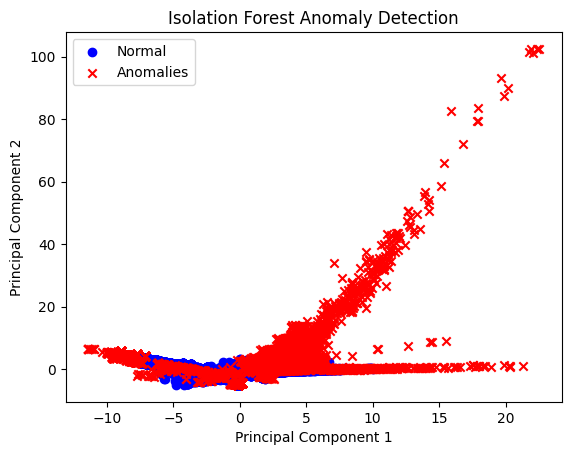

Accuracy: 0.3637012803048825
Precision: 0.5277864017385905
Recall: 0.04129395832953793
F1-score: 0.07659512156659551


In [24]:


X = dataframe.drop('label', axis=1)

y_true = dataframe['label'] 

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

iso_forest = IsolationForest(contamination=0.05, random_state=42) 
iso_forest.fit(X_std)

y_pred = iso_forest.fit_predict(X_std)

y_pred_binary = (y_pred == -1).astype(int)

y_pred[y_pred == 1] = 0  
y_pred[y_pred == -1] = 1  

plt.scatter(X_pca[y_pred == 0, 0], X_pca[y_pred == 0, 1], c='blue', label='Normal')
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], c='red', marker='x', label='Anomalies')

plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
accuracy = accuracy_score(y_true, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [25]:
dataframe.insert(1, 'predicted_label', y_pred_binary)
dataframe.sample(10)

label  predicted_label       dur  proto  service  state  spkts  dpkts  \
41873       0                0  1.201892  113.0      0.0    4.0   12.0   10.0   
107742      1                0  0.000006  119.0      0.0    5.0    2.0    0.0   
38601       0                0  0.001671  119.0      0.0    2.0    4.0    4.0   
164271      1                0  0.000002  119.0      2.0    5.0    2.0    0.0   
3020        0                0  0.061807  113.0      0.0    4.0   80.0   80.0   
152047      1                0  0.000006  119.0      2.0    5.0    2.0    0.0   
71275       1                0  1.389820  113.0      9.0    4.0   56.0   26.0   
148213      1                0  0.410175  113.0      0.0    4.0   12.0   14.0   
49317       1                0  0.000006  119.0      0.0    5.0    2.0    0.0   
76808       0                1  0.000000    6.0      0.0    5.0    1.0    0.0   

         sbytes   dbytes  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
41873     694.0    646.0  ...               1.0               1.0   
107742   1064.0      0.0  ...              13.0               1.0   
38601     528.0    304.0  ...               1.0               1.0   
164271    114.0      0.0  ...              17.0              17.0   
3020     4654.0  72810.0  ...               1.0               1.0   
152047    114.0      0.0  ...              11.0              11.0   
71275   52686.0   2032.0  ...               1.0               1.0   
148213    588.0    915.0  ...               1.0               1.0   
49317     104.0      0.0  ...               1.0               1.0   
76808      46.0      0.0  ...               1.0               1.0   

        ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
41873              3.0           0.0         0.0               0.0   
107742            35.0           0.0         0.0               0.0   
38601              3.0           0.0         0.0               0.0   
164271            22.0           0.0         0.0               0.0   
3020               1.0           0.0         0.0               0.0   
152047            27.0           0.0         0.0               0.0   
71275              1.0           0.0         0.0               0.0   
148213             1.0           0.0         0.0               0.0   
49317              4.0           0.0         0.0               0.0   
76808              1.0           0.0         0.0               0.0   

        ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  
41873          1.0         3.0              0.0         6.0  
107742        13.0        35.0              0.0         4.0  
38601          3.0         5.0              0.0         6.0  
164271        17.0        22.0              0.0         5.0  
3020           2.0        16.0              0.0         6.0  
152047        11.0        27.0              0.0         5.0  
71275          1.0         1.0              0.0         3.0  
148213         1.0         1.0              0.0         3.0  
49317          1.0         4.0              0.0         4.0  
76808          1.0         1.0              1.0         6.0  

[10 rows x 45 columns]

# Zeitreihe Datensatz

In [2]:
# Download the dataset
dataframe_2 = pd.read_csv('./data/creditcard.csv')
dataframe_2.head(30) 

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
13  11.0  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
14  12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15  12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
16  12.0  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
17  13.0 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
18  14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
19  15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   
20  16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
21  17.0  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038   
22  18.0  1.166616  0.502120 -0.067300  2.261569  0.428804  0.089474   
23  18.0  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116   
24  22.0 -1.946525 -0.044901 -0.405570 -1.013057  2.941968  2.955053   
25  22.0 -2.074295 -0.121482  1.322021  0.410008  0.295198 -0.959537   
26  23.0  1.173285  0.353498  0.283905  1.133563 -0.172577 -0.916054   
27  23.0  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   
28  23.0 -0.414289  0.905437  1.727453  1.473471  0.007443 -0.200331   
29  23.0  1.059387 -0.175319  1.266130  1.186110 -0.786002  0.578435   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1  -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2   0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3   0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4   0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
5   0.476201  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
7   1.120631 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709   
8   0.370145  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592   
9   0.651583  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050   
10 -1.423236  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512   
11  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   
12 -0.689405 -0.227487 -2.094011  ... -0.231809 -0.483285  0.084668  0.392831   
13 -0.096717  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744   
14 -0.422911 -1.907107  0.755713  ...  1.151663  0.222182  1.020586  0.028317   
15 -0.608581  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084   
16 -0.586057  0.189380  0.782333  ... -0.024612  0.196002  0.013802  0.103758   
17  0.707642  0.087962 -0.665271  ... -0.194796 -0.672638 -0.156858 -0.888386   
18 -1.559738  0.160842  1.233090  ... -0.503600  0.984460  2.458589  0.042119   
19 -1.080664 -0.053127 -1.978682  ... -0.177650 -0.175074  0.040002  0.295814   
20 -0.878586  0.445290 -0.446196  ... -0.295583 -0.571955 -0.050881 -0

In [3]:
x = dataframe_2.drop('Class', axis=1)

x_anomalies = x[dataframe_2['Class'] == 1]

X = x[dataframe_2['Class'] == 0]


In [4]:
x_anomalies

Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V20       V21       V22  \
541    -2.537387  1.391657 -2.770089  ...  0.126911  0.517232 -0.035049   
623     0.325574 -0.067794 -0.270953  ...  2.102339  0.661696  0.435477   
4920    0.562320 -0.399147 -0.238253  ... -0.430022 -0.294166 -0.932391   
6108   -3.496197 -0.248778 -0.247768  ... -0.171608  0.573574  0.176968   
6329    1.713445 -0.496358 -1.282858  ...  0.009061 -0.379068 -0.704181   
...          ...       ...       ...  ...       ...       ...       ...   
279863 -0.882850  0.697211 -2.064945  ...  1.252967  0.778584 -0.319189   
280143 -1.413170  0.248525 -1.127396  ...  0.226138  0.370612  0.028234   
280149 -2.234739  1.210158 -0.652250  ...  0.247968  0.751826  0.834108   
281144 -2.208002  1.058733 -1.632333  ...  0.306271  0.583276 -0.269209   
281674  0.223050 -0.068384  0.577829  ... -0.017652 -0.164350 -0.295135   

             V23       V24       V25       V26       V27       V28  Amount  
541    -0.465211  0.320198  0.044519  0.177840  0.261145 -0.143276    0.00  
623     1.375966 -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00  
4920    0.172726 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93  
6108   -0.436207 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00  
6329   -0.656805 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00  
...          ...       ...       ...       ...       ...       ...     ...  
279863  0.639419 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00  
280143 -0.145640 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76  
280149  0.190944  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89  
281144 -0.456108 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00  
281674 -0.072173 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53  

[492 rows x 30 columns]

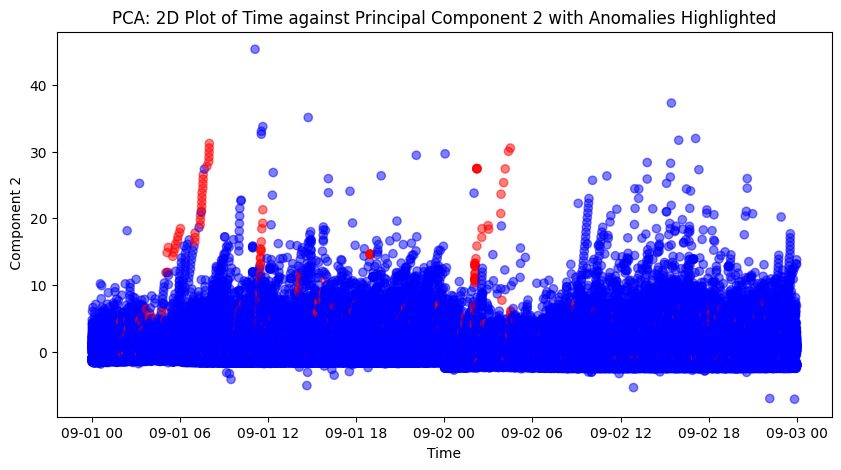

In [5]:
# Starting date
start_date = pd.to_datetime('1970-01-01')

offset = pd.DateOffset(years=43, months=8)

new_date = start_date + offset

seconds_data =  x['Time']

new_dates = [new_date + timedelta(seconds=seconds) for seconds in seconds_data]


features_for_pca = x.drop('Time', axis=1)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_for_pca)

plt.figure(figsize=(10, 5))

# Scatter plot with anomalies in red
plt.scatter(new_dates, reduced_data[:, 1], c=np.where(dataframe_2['Class'] == 1, 'red', 'blue'), marker='o', alpha=0.5)

plt.title('PCA: 2D Plot of Time against Principal Component 2 with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel(' Component 2')
plt.show()


In [6]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

In [7]:
sequence_length = 12
X_sequences = create_sequences(X.values, sequence_length)
#y_sequences = y[sequence_length - 1:]
x_anomalies = create_sequences(x_anomalies.values, sequence_length)

In [8]:
X_train, X_test = train_test_split(X_sequences, test_size=0.2, random_state=42)


In [9]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
x_anomalies_scaled = scaler.transform(x_anomalies.reshape(-1, x_anomalies.shape[-1])).reshape(x_anomalies.shape)

In [10]:
num_features = X_train.shape[-1]
sparsity_factor = 1e-7
filters = 32
kernel_size = 3
input_shape = (sequence_length, num_features)

In [11]:
print(X_train.shape)

(227443, 12, 30)


In [12]:
print(input_shape)

(12, 30)


### Sparse convolutional Autoencoder

In [13]:
class SparseConvAutoencoder(tf.keras.Model):
    def __init__(self, filters, kernel_size, input_shape, sparsity_factor):
        super(SparseConvAutoencoder, self).__init__()

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=input_shape),
            layers.Conv1D(filters=filters, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                          activity_regularizer=regularizers.l1(sparsity_factor)),
            layers.Conv1D(filters=filters // 2, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                          activity_regularizer=regularizers.l1(sparsity_factor)),
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(filters=filters // 2, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                                   activity_regularizer=regularizers.l1(sparsity_factor)),
            layers.Conv1DTranspose(filters=filters, kernel_size=kernel_size, padding="same", strides=2, activation="relu",
                                   activity_regularizer=regularizers.l1(sparsity_factor)),
            layers.Conv1DTranspose(num_features, kernel_size=kernel_size, padding="same"),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [14]:
sparse_conv_autoencoder = SparseConvAutoencoder(filters=filters, kernel_size=kernel_size,
                                                input_shape=input_shape, sparsity_factor=sparsity_factor)
sparse_conv_autoencoder.build((None,) + input_shape)

sparse_conv_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="mse")
sparse_conv_autoencoder.summary()



Model: "sparse_conv_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3, 16)             4464      
                                                                 
 sequential_1 (Sequential)   (None, 12, 30)            5262      
                                                                 
Total params: 9726 (37.99 KB)
Trainable params: 9726 (37.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history_sparse_convolutional = sparse_conv_autoencoder.fit(X_train_scaled, X_train_scaled, 
                                                           epochs=20, 
                                                           batch_size=1000,
                                                           shuffle=True, 
                                                           validation_data=(X_test_scaled, X_test_scaled)
)


Epoch 1/20

228/228 [==============================] - 12s 34ms/step - loss: 0.1669 - val_loss: 0.0503
Epoch 2/20
228/228 [==============================] - 7s 31ms/step - loss: 0.0260 - val_loss: 0.0127
Epoch 3/20
228/228 [==============================] - 6s 26ms/step - loss: 0.0088 - val_loss: 0.0065
Epoch 4/20
228/228 [==============================] - 6s 26ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 5/20
228/228 [==============================] - 6s 26ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 6/20
228/228 [==============================] - 6s 25ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 7/20
228/228 [==============================] - 6s 26ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 8/20
228/228 [==============================] - 6s 25ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 9/20
228/228 [==============================] - 6s 26ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 10/20
228/228 [==============================] - 6s 26ms/step - loss: 0.0023 - val_

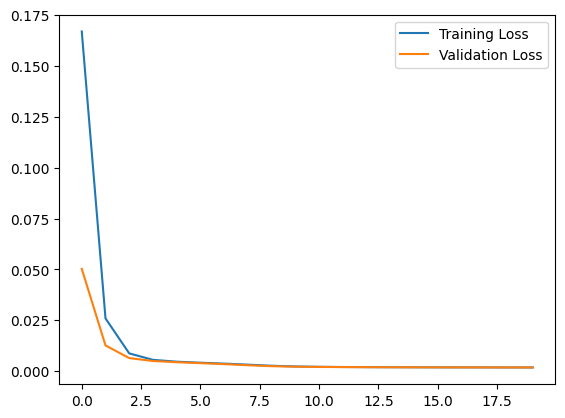

In [16]:
plt.plot(history_sparse_convolutional.history["loss"], label="Training Loss")
plt.plot(history_sparse_convolutional.history["val_loss"], label="Validation Loss")
plt.legend()

7108/7108 [==============================] - 28s 4ms/step


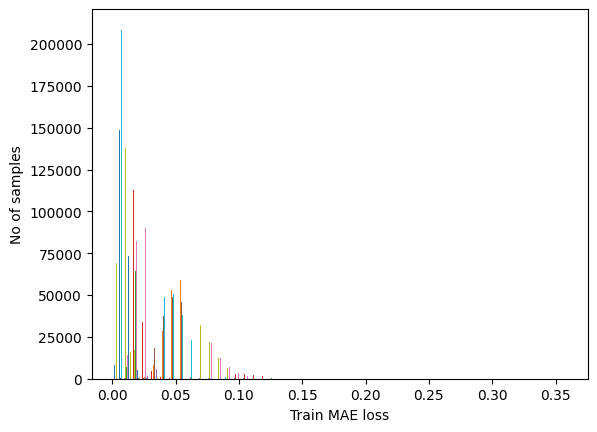

Reconstruction error threshold:  0.35846842394006057


In [17]:
x_train_pred = sparse_conv_autoencoder.predict(X_train_scaled)
train_mae_loss = np.mean(np.abs(x_train_pred - X_train_scaled), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

threshold_sparse = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold_sparse)

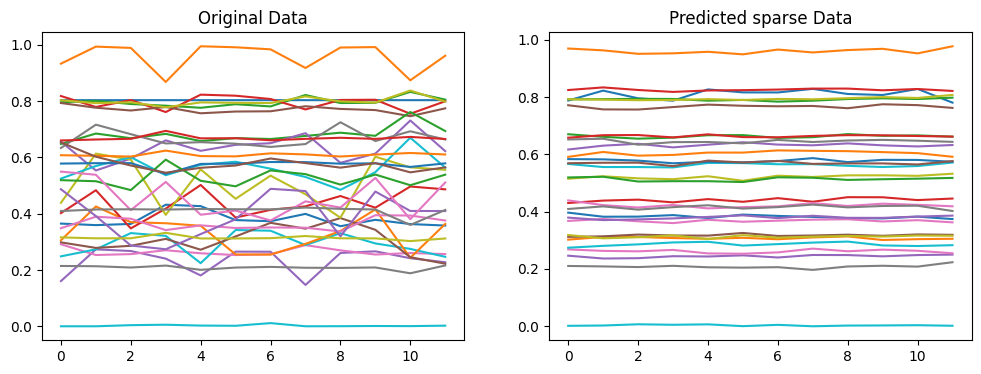

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(X_train_scaled[0])
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.plot(x_train_pred[0])
plt.title('Predicted sparse Data')

plt.show()

16/16 [==============================] - 0s 6ms/step


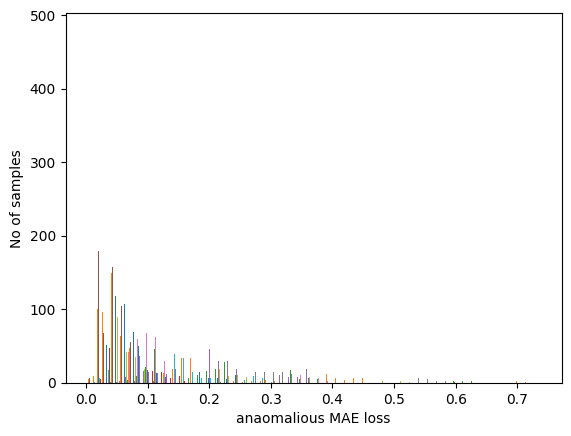

In [19]:
# Get train MAE loss.
x_anomalies_pred = sparse_conv_autoencoder.predict(x_anomalies_scaled)
anomalies_mae_loss = np.mean(np.abs(x_anomalies_pred - x_anomalies_scaled), axis=1)

plt.hist(anomalies_mae_loss, bins=50)
plt.xlabel("anaomalious MAE loss")
plt.ylabel("No of samples")
plt.show()


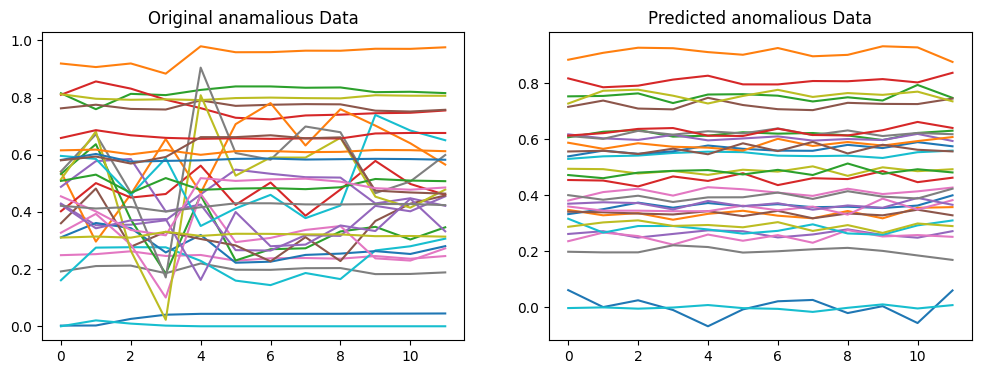

In [20]:
plt.figure(figsize=(12, 4))

# Subplot for original data
plt.subplot(1, 2, 1)
plt.plot(x_anomalies_scaled[0])
plt.title('Original anamalious Data')

# Subplot for predicted data
plt.subplot(1, 2, 2)
plt.plot(x_anomalies_pred[0])
plt.title('Predicted anomalious Data')

plt.show()

### contractive convolutional Autoencoder

In [21]:
input_shape = (sequence_length, num_features)

In [22]:
class ContractiveConvAnomalyDetector(tf.keras.Model):
    def __init__(self, lam):
        super(ContractiveConvAnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=input_shape),
            layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1D(filters=8, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization()
        ])

        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(filters=8, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(filters=30, kernel_size=3, activation="sigmoid", padding="same"), 
        ])
        self.lam = lam  # Regularization strength of autoencoder

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def compute_jacobian(self, x):
        x = tf.convert_to_tensor(x)  
    
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            encoded = self.encoder(x)
    
        jacobian = tape.jacobian(encoded, x)
        
        return jacobian

    def contractive_loss(self, x, x_hat, jacobian):
        mse_loss = tf.reduce_mean(tf.square(x - x_hat))
        squared_jacobian = tf.square(jacobian)
        frobenius_norm = tf.sqrt(tf.reduce_sum(squared_jacobian))        
        total_loss = mse_loss + self.lam * frobenius_norm
        return total_loss   

In [23]:
 def train_step(self, data):
        x, _ = data
        with tf.GradientTape() as tape:
            x_hat = self(x)
            jacobian = self.compute_jacobian(x)
            loss = self.contractive_loss(x, x_hat, jacobian)
            
        gradients = tape.gradient(loss, self.trainable_variables)
       
        clipped_gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)        
        self.optimizer.apply_gradients(zip(clipped_gradients, self.trainable_variables))

        return {"loss": loss}

In [24]:
contractive_convolutional_autoencoder = ContractiveConvAnomalyDetector(lam=1e-8)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000,
    decay_rate=0.09,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

contractive_convolutional_autoencoder.compile(optimizer=optimizer, loss='mse')


In [25]:
contractive_convolutional_autoencoder.build(input_shape=(None, 12, 30))
contractive_convolutional_autoencoder.summary()

Model: "contractive_conv_anomaly_detector"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 12, 8)             17848     
                                                                 
 sequential_3 (Sequential)   (None, 12, 30)            14646     
                                                                 
Total params: 32494 (126.93 KB)
Trainable params: 31950 (124.80 KB)
Non-trainable params: 544 (2.12 KB)
_________________________________________________________________


In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True)

history_convolutional_contractive = contractive_convolutional_autoencoder.fit(X_train_scaled, X_train_scaled, 
                                                                              epochs=20, 
                                                                              batch_size=1000, 
                                                                              shuffle=True, 
                                                                              validation_data=(X_test_scaled, X_test_scaled),
                                                                              callbacks=[early_stopping])



Epoch 1/10
228/228 [==============================] - 36s 120ms/step - loss: 0.0556 - val_loss: 0.0240
Epoch 2/10
228/228 [==============================] - 25s 108ms/step - loss: 0.0153 - val_loss: 0.0068
Epoch 3/10
228/228 [==============================] - 25s 109ms/step - loss: 0.0057 - val_loss: 0.0039
Epoch 4/10
228/228 [==============================] - 25s 111ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 5/10
228/228 [==============================] - 25s 108ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 6/10
228/228 [==============================] - 29s 125ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 7/10
228/228 [==============================] - 25s 111ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 8/10
228/228 [==============================] - 27s 118ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/10
228/228 [==============================] - 25s 111ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 10/10
228/228 [==============================] - 25s 111ms/step - l

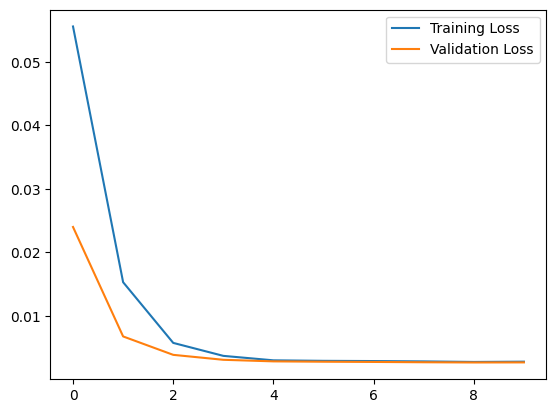

In [27]:
plt.plot(history_convolutional_contractive.history["loss"], label="Training Loss")
plt.plot(history_convolutional_contractive.history["val_loss"], label="Validation Loss")
plt.legend()

7108/7108 [==============================] - 48s 7ms/step


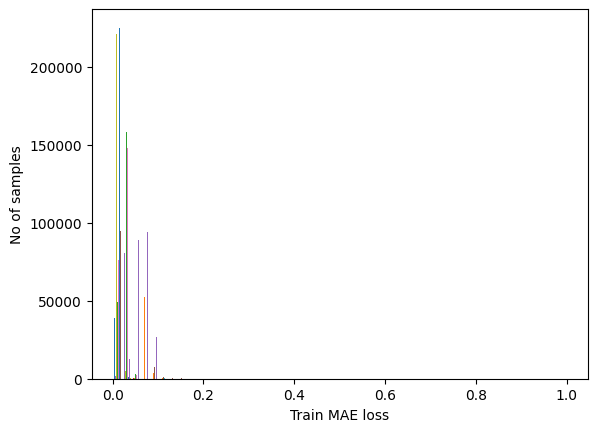

Reconstruction error threshold:  0.03359003260963097


In [28]:
# Get train MAE loss.
x_train_pred = contractive_convolutional_autoencoder.predict(X_train_scaled)
train_mae_loss = np.mean(np.abs(x_train_pred - X_train_scaled), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold_contractive = np.mean(train_mae_loss)
print("Reconstruction error threshold: ", threshold_contractive)

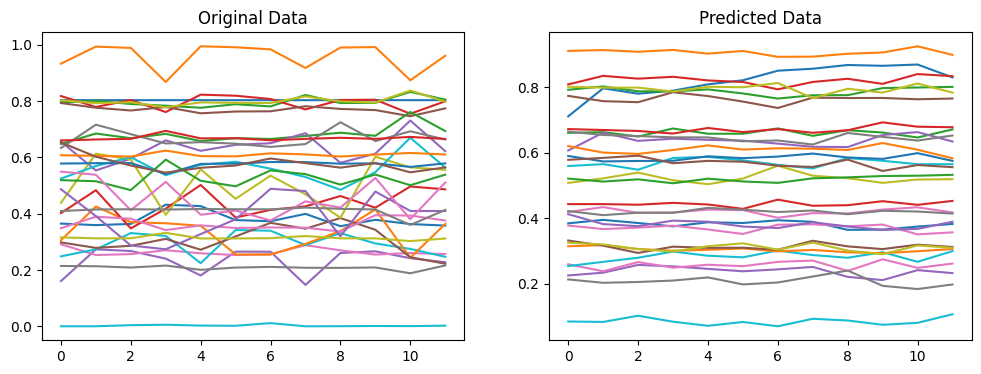

In [29]:
plt.figure(figsize=(12, 4))

# Subplot for original data
plt.subplot(1, 2, 1)
plt.plot(X_train_scaled[0])
plt.title('Original Data')

# Subplot for predicted data
plt.subplot(1, 2, 2)
plt.plot(x_train_pred[0])
plt.title('Predicted Data')

plt.show()

16/16 [==============================] - 0s 9ms/step


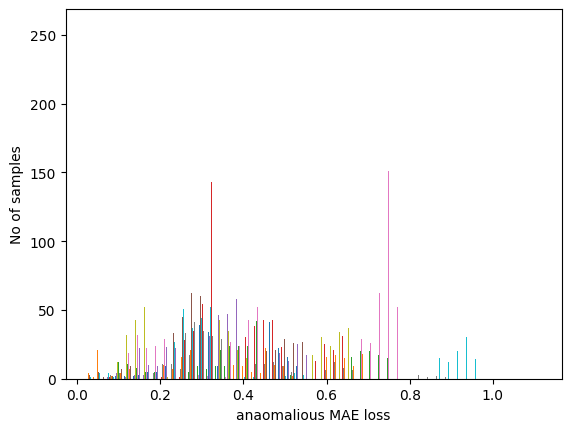

In [30]:
# Get train MAE loss.
x_anomalies_pred = contractive_convolutional_autoencoder.predict(x_anomalies_scaled)
anomalies_mae_loss = np.mean(np.abs(x_anomalies_pred - x_anomalies_scaled), axis=1)

plt.hist(anomalies_mae_loss, bins=50)
plt.xlabel("anaomalious MAE loss")
plt.ylabel("No of samples")
plt.show()


In [31]:
print(train_mae_loss)
values_1 = np.mean(train_mae_loss)  
print(values_1)
#threshold_contractive = np.max(train_mae_loss) =  0.3476974647813221

[[0.03976824 0.06729921 0.01314586 ... 0.01056829 0.01128677 0.08315313]
 [0.04696648 0.07607824 0.02072112 ... 0.01160692 0.01500406 0.08740639]
 [0.03637238 0.06295187 0.01019406 ... 0.00758604 0.00994284 0.08416599]
 ...
 [0.00967703 0.061812   0.00760748 ... 0.01078633 0.00570626 0.08389275]
 [0.02403661 0.06586473 0.01435508 ... 0.00929789 0.00534052 0.08578251]
 [0.01638926 0.05600392 0.01380518 ... 0.00863335 0.00855905 0.08349934]]
0.03359003260963097


In [32]:
print(anomalies_mae_loss)
#anomalies_mae_loss = np.mean(np.abs(x_anomalies_pred - x_anomalies_scaled), axis=1)
values = np.mean(anomalies_mae_loss)  
print(values)

[[0.74755135 0.2286354  0.67009454 ... 0.26995897 0.62539185 0.96231505]
 [0.81940186 0.16910297 0.66585258 ... 0.23894562 0.67665783 0.99623217]
 [0.79943261 0.18898933 0.67750478 ... 0.25942401 0.68109664 0.99856587]
 ...
 [0.31086315 0.11710521 0.44869096 ... 0.2258996  0.63551803 0.86239514]
 [0.2549624  0.06406337 0.40758997 ... 0.29525047 0.65363499 0.84082613]
 [0.2142577  0.03754812 0.28447477 ... 0.12749669 0.34652382 0.52331491]]
0.386396335691344


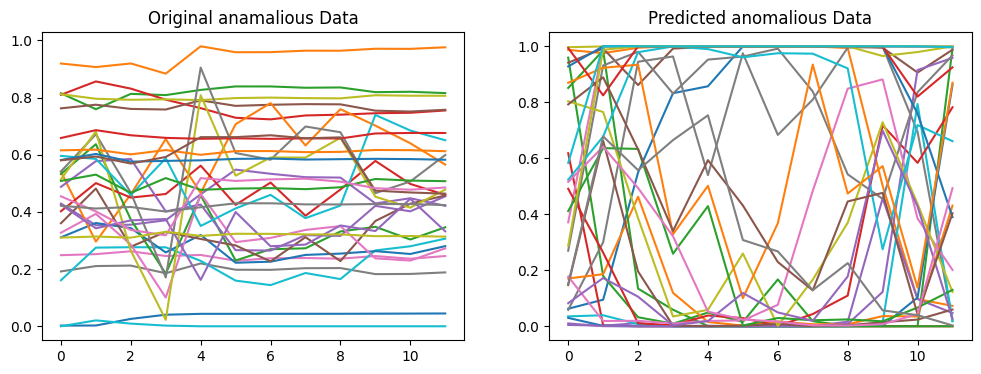

In [33]:
plt.figure(figsize=(12, 4))

# Subplot for original data
plt.subplot(1, 2, 1)
plt.plot(x_anomalies_scaled[0])
plt.title('Original anamalious Data')

# Subplot for predicted data
plt.subplot(1, 2, 2)
plt.plot(x_anomalies_pred[0])
plt.title('Predicted anomalious Data')

plt.show()

In [34]:
dataset = dataframe_2
dataset_labels = dataset['Class']
#dataset= dataset.drop('Class', axis=1)
dataset['Time_in_years'] = new_dates


In [35]:
dataset[:30]

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
13  11.0  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
14  12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15  12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
16  12.0  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
17  13.0 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
18  14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
19  15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   
20  16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
21  17.0  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038   
22  18.0  1.166616  0.502120 -0.067300  2.261569  0.428804  0.089474   
23  18.0  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116   
24  22.0 -1.946525 -0.044901 -0.405570 -1.013057  2.941968  2.955053   
25  22.0 -2.074295 -0.121482  1.322021  0.410008  0.295198 -0.959537   
26  23.0  1.173285  0.353498  0.283905  1.133563 -0.172577 -0.916054   
27  23.0  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   
28  23.0 -0.414289  0.905437  1.727453  1.473471  0.007443 -0.200331   
29  23.0  1.059387 -0.175319  1.266130  1.186110 -0.786002  0.578435   

          V7        V8        V9  ...       V22       V23       V24       V25  \
0   0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539   
1  -0.078803  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170   
2   0.791461  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642   
3   0.237609  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376   
4   0.592941 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010   
5   0.476201  0.260314 -0.568671  ... -0.559825 -0.026398 -0.371427 -0.232794   
6  -0.005159  0.081213  0.464960  ... -0.270710 -0.154104 -0.780055  0.750137   
7   1.120631 -3.807864  0.615375  ... -1.015455  0.057504 -0.649709 -0.415267   
8   0.370145  0.851084 -0.392048  ... -0.268092 -0.204233  1.011592  0.373205   
9   0.651583  0.069539 -0.736727  ... -0.633753 -0.120794 -0.385050 -0.069733   
10 -1.423236  0.048456 -1.720408  ...  0.313894  0.027740  0.500512  0.251367   
11  0.470455  0.538247 -0.558895  ...  0.238422  0.009130  0.996710 -0.767315   
12 -0.689405 -0.227487 -2.094011  ... -0.483285  0.084668  0.392831  0.161135   
13 -0.096717  0.115982 -0.221083  ...  0.074412 -0.071407  0.104744  0.548265   
14 -0.422911 -1.907107  0.755713  ...  0.222182  1.020586  0.028317 -0.232746   
15 -0.608581  0.003603 -0.436167  ...  1.353650 -0.256573 -0.065084 -0.039124   
16 -0.586057  0.189380  0.782333  ...  0.196002  0.013802  0.103758  0.364298   
17  0.707642  0.087962 -0.665271  ... -0.672638 -0.156858 -0.888386 -0.342413   
18 -1.559738  0.160842  1.233090  ...  0.984460  2.458589  0.042119 -0.481631   
19 -1.080664 -0.053127 -1.978682  ... -0.175074  0.040002  0.295814  0.332931   
20 -0.878586  0.445290 -0.446196  ... -0.571955 -0.050881 -0.304215  0

In [36]:
def extract_time_interval_df(data, start_time, end_time):
    mask = (data['Time_in_years'] >= start_time) & (data['Time_in_years'] <= end_time)    
    data_range = data.loc[mask]

    return data_range


In [37]:

# Convert the list to a set to get unique timestamps
unique_timestamps = set(new_dates)

for timestamp in sorted(unique_timestamps, reverse=False):
    print(timestamp)

2013-09-01 00:00:00
2013-09-01 00:00:01
2013-09-01 00:00:02
2013-09-01 00:00:04
2013-09-01 00:00:07
2013-09-01 00:00:09
2013-09-01 00:00:10
2013-09-01 00:00:11
2013-09-01 00:00:12
2013-09-01 00:00:13
2013-09-01 00:00:14
2013-09-01 00:00:15
2013-09-01 00:00:16
2013-09-01 00:00:17
2013-09-01 00:00:18
2013-09-01 00:00:22
2013-09-01 00:00:23
2013-09-01 00:00:24
2013-09-01 00:00:25
2013-09-01 00:00:26
2013-09-01 00:00:27
2013-09-01 00:00:29
2013-09-01 00:00:32
2013-09-01 00:00:33
2013-09-01 00:00:34
2013-09-01 00:00:35
2013-09-01 00:00:36
2013-09-01 00:00:37
2013-09-01 00:00:38
2013-09-01 00:00:39
2013-09-01 00:00:40
2013-09-01 00:00:41
2013-09-01 00:00:42
2013-09-01 00:00:44
2013-09-01 00:00:46
2013-09-01 00:00:47
2013-09-01 00:00:48
2013-09-01 00:00:49
2013-09-01 00:00:50
2013-09-01 00:00:51
2013-09-01 00:00:52
2013-09-01 00:00:53
2013-09-01 00:00:54
2013-09-01 00:00:55
2013-09-01 00:00:56
2013-09-01 00:00:59
2013-09-01 00:01:00
2013-09-01 00:01:02
2013-09-01 00:01:04
2013-09-01 00:01:07


In [38]:
start_time = '2013-09-01 00:00:00'
end_time = '2013-09-02 23:00:02'
interval_data = extract_time_interval_df(dataset, start_time, end_time)
interval_labels_data = extract_time_interval_df(dataset, start_time, end_time)['Class']

interval_data = interval_data.drop('Class', axis=1)

In [39]:
print(interval_data.shape)
print("interval labels ",interval_labels_data.shape)


(279952, 31)
interval labels  (279952,)


In [40]:
interval_data = interval_data.drop('Time_in_years', axis=1)
interval_data = create_sequences(interval_data.values, sequence_length)
interval_data = scaler.transform(interval_data.reshape(-1, interval_data.shape[-1])).reshape(interval_data.shape)

interval_data.shape


(279941, 12, 30)

In [41]:
interval_labels_data = create_sequences(interval_labels_data.values, sequence_length)
#interval_labels_data = scaler.transform(interval_labels_data.reshape(-1, interval_labels_data.shape[-1])).reshape(interval_labels_data.shape)
interval_labels_data.shape

(279941, 12)

In [42]:
def predict_anomalies(model, time_interval_data): 
    
    global global_threshold 
    batch_size = 32  
    anomaly_scores = model.predict(time_interval_data, batch_size=batch_size)   
    
    plt.figure(figsize=(12, 4))
    loss = tf.keras.losses.mae(model(time_interval_data), time_interval_data)
    
    mean_loss = np.mean(loss)
    std_loss = np.std(loss)
    threshold_multiplier = 2  # Adjust the multiplier
    global_threshold = mean_loss + threshold_multiplier * std_loss

    # Subplot for original data
    plt.subplot(1, 2, 1)
    plt.plot(interval_data[0])
    plt.title('Original range Data')
    
    # Subplot for predicted data
    plt.subplot(1, 2, 2)
    plt.plot(anomaly_scores[0])
    plt.title('Predicted range Data')
    
    plt.show()
    #print(anomalies)
    return tf.math.less(global_threshold, loss)


In [ ]:
#subset_predictions = predict_anomalies(contractive_convolutional_autoencoder, threshold_contractive, interval_data)

# average parameter can be macro, weighted, samples, micro
def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions, average='micro')))
  print("Recall = {}".format(recall_score(labels, predictions, average='micro')))
    
preds = predict_anomalies(contractive_convolutional_autoencoder, interval_data)

print('contractive convolutional autoencoder')
print_stats(preds, interval_labels_data)
print("Threshold: ", global_threshold)

8749/8749 [==============================] - 63s 7ms/step


#### für ein sparse contractive autoencoder 

In [ ]:
preds = predict_anomalies(sparse_conv_autoencoder, interval_data)

print('sparse convolutional autoencoder')
print_stats(preds, interval_labels_data)
print("Threshold: ", global_threshold)